# Telecom Churn

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Loading and Understanding Data

In [1]:
#importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

In [3]:
# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the data
df=pd.read_csv("telecom_churn_data.csv")

In [5]:
#glance at data
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
#information about data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [7]:
#statistical look at data
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
#shape of data
df.shape

(99999, 226)

In [9]:
#datatypes
df.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [10]:
#we see that mobile_number is the unique number for each customer, so checking the unique mobile numbers
df['mobile_number'].nunique()
#so all the records are unique 

99999

### 2. Missing value Imputation and Data Preparation

In [11]:
#find the missing values in data
round((df.isnull().sum())/df.shape[0]*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [12]:
#treating the missing values for "loc_og_t2o_mou" feature
df['loc_og_t2o_mou'].describe()

count    98981.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64

In [13]:
#we see that all the values in loc_og_t2o_mou are 0 and therein no variance in data,hence no information,so dropping it
df=df.drop(['loc_og_t2o_mou'],1)

In [14]:
#treating the missing values for "std_og_t2o_mou" feature
df['std_og_t2o_mou'].describe()

count    98981.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64

In [15]:
#we see that all the values in std_og_t2o_mou are 0 and therein no variance in data,hence no information,so dropping it
df=df.drop(['std_og_t2o_mou'],1)

In [16]:
#treating the missing values for "loc_ic_t2o_mou" feature
df['loc_ic_t2o_mou'].describe()

count    98981.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_ic_t2o_mou, dtype: float64

In [17]:
#we see that all the values in loc_ic_t2o_mou are 0 and therein no variance in data,hence no information,so dropping it
df=df.drop(['loc_ic_t2o_mou'],1)

In [18]:
#treating the missing values for "last_date_of_month_7" feature
df['last_date_of_month_7'].value_counts()

7/31/2014    99398
Name: last_date_of_month_7, dtype: int64

In [19]:
#we see that all the values in last_date_of_month_7 are 7/31/2014 and therein no variance in data,hence no information,so dropping it
df=df.drop(['last_date_of_month_7'],1)

In [20]:
#treating the missing values for "last_date_of_month_8" feature
df['last_date_of_month_8'].describe()

count         98899
unique            1
top       8/31/2014
freq          98899
Name: last_date_of_month_8, dtype: object

In [21]:
#we see that all the values in last_date_of_month_8 are 8/31/2014 and therein no variance in data,hence no information,so dropping it
df=df.drop(['last_date_of_month_8'],1)

In [22]:
#treating the missing values for "last_date_of_month_9" feature
df['last_date_of_month_9'].describe()

count         98340
unique            1
top       9/30/2014
freq          98340
Name: last_date_of_month_9, dtype: object

In [23]:
#we see that all the values in last_date_of_month_9 are 9/30/2014 and therein no variance in data,hence no information,so dropping it
df=df.drop(['last_date_of_month_9'],1)

In [24]:
#treating the missing values for "onnet_mou_6" feature
df['onnet_mou_6'].describe()

count    96062.000000
mean       132.395875
std        297.207406
min          0.000000
25%          7.380000
50%         34.310000
75%        118.740000
max       7376.710000
Name: onnet_mou_6, dtype: float64

In [25]:
#onnet_mou_6 tells us the no. of calls within the same network in month 6,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['onnet_mou_6']=df['onnet_mou_6'].fillna(0.0)

In [26]:
#treating the missing values for "onnet_mou_7" feature
df['onnet_mou_7'].describe()

count    96140.000000
mean       133.670805
std        308.794148
min          0.000000
25%          6.660000
50%         32.330000
75%        115.595000
max       8157.780000
Name: onnet_mou_7, dtype: float64

In [27]:
#onnet_mou_7 tells us the no. of calls within the same network in month 7,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['onnet_mou_7']=df['onnet_mou_7'].fillna(0)

In [28]:
#treating the missing values for "onnet_mou_8" feature
df['onnet_mou_8'].describe()

count    94621.000000
mean       133.018098
std        308.951589
min          0.000000
25%          6.460000
50%         32.360000
75%        115.860000
max      10752.560000
Name: onnet_mou_8, dtype: float64

In [29]:
#onnet_mou_8 tells us the no. of calls within the same network in month 8,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['onnet_mou_8']=df['onnet_mou_8'].fillna(0)

In [30]:
#treating the missing values for "onnet_mou_9" feature
df['onnet_mou_9'].describe()

count    92254.000000
mean       130.302327
std        308.477668
min          0.000000
25%          5.330000
50%         29.840000
75%        112.130000
max      10427.460000
Name: onnet_mou_9, dtype: float64

In [31]:
#onnet_mou_9 tells us the no. of calls within the same network in month 9,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['onnet_mou_9']=df['onnet_mou_9'].fillna(0)

In [32]:
df.shape

(99999, 220)

In [33]:
#treating the missing values for "offnet_mou_6" feature
df['offnet_mou_6'].describe()

count    96062.000000
mean       197.935577
std        316.851613
min          0.000000
25%         34.730000
50%         96.310000
75%        231.860000
max       8362.360000
Name: offnet_mou_6, dtype: float64

In [34]:
#offnet_mou_6 tells us the no. of calls outside the network in month 6,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['offnet_mou_6']=df['offnet_mou_6'].fillna(0)

In [35]:
#treating the missing values for "offnet_mou_7" feature
df['offnet_mou_7'].describe()

count    96140.000000
mean       197.045133
std        325.862803
min          0.000000
25%         32.190000
50%         91.735000
75%        226.815000
max       9667.130000
Name: offnet_mou_7, dtype: float64

In [36]:
#offnet_mou_7 tells us the no. of calls outside the network in month 7,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['offnet_mou_7']=df['offnet_mou_7'].fillna(0)

In [37]:
#treating the missing values for "offnet_mou_8" feature
df['offnet_mou_8'].describe()

count    94621.000000
mean       196.574803
std        327.170662
min          0.000000
25%         31.630000
50%         92.140000
75%        228.260000
max      14007.340000
Name: offnet_mou_8, dtype: float64

In [38]:
#offnet_mou_8 tells us the no. of calls outside the network in month 8,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['offnet_mou_8']=df['offnet_mou_8'].fillna(0)

In [39]:
#treating the missing values for "offnet_mou_9" feature
df['offnet_mou_9'].describe()

count    92254.000000
mean       190.337222
std        319.396092
min          0.000000
25%         27.130000
50%         87.290000
75%        220.505000
max      10310.760000
Name: offnet_mou_9, dtype: float64

In [40]:
#offnet_mou_9 tells us the no. of calls outside the network in month 9,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['offnet_mou_9']=df['offnet_mou_9'].fillna(0)

In [41]:
#treating the missing values for "roam_ic_mou_6" feature
df['roam_ic_mou_6'].describe()

count    96062.000000
mean         9.950013
std         72.825411
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      13724.380000
Name: roam_ic_mou_6, dtype: float64

In [42]:
#roam_ic_mou_6 tells us the no. of roaming incomming calls in month 6,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['roam_ic_mou_6']=df['roam_ic_mou_6'].fillna(0)

In [43]:
#treating the missing values for "roam_ic_mou_7" feature
df['roam_ic_mou_7'].describe()

count    96140.000000
mean         7.149898
std         73.447948
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15371.040000
Name: roam_ic_mou_7, dtype: float64

In [44]:
#roam_ic_mou_7 tells us the no. of roaming incomming calls in month 7,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['roam_ic_mou_7']=df['roam_ic_mou_7'].fillna(0)

In [45]:
#treating the missing values for "roam_ic_mou_8" feature
df['roam_ic_mou_8'].describe()

count    94621.000000
mean         7.292981
std         68.402466
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      13095.360000
Name: roam_ic_mou_8, dtype: float64

In [46]:
#roam_ic_mou_8 tells us the no. of roaming incomming calls in month 8,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['roam_ic_mou_8']=df['roam_ic_mou_8'].fillna(0)

In [47]:
#treating the missing values for "roam_ic_mou_9" feature
df['roam_ic_mou_9'].describe()

count    92254.000000
mean         6.343841
std         57.137537
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       8464.030000
Name: roam_ic_mou_9, dtype: float64

In [48]:
#roam_ic_mou_9 tells us the no. of roaming incomming calls in month 9,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['roam_ic_mou_9']=df['roam_ic_mou_9'].fillna(0)

In [49]:
#treating the missing values for "roam_og_mou_6" feature
df['roam_og_mou_6'].describe()

count    96062.000000
mean        13.911337
std         71.443196
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3775.110000
Name: roam_og_mou_6, dtype: float64

In [50]:
#roam_og_mou_6 tells us the no. of roaming outgoing calls in month 6,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['roam_og_mou_6']=df['roam_og_mou_6'].fillna(0)

In [51]:
#treating the missing values for "roam_og_mou_7" feature
df['roam_og_mou_7'].describe()

count    96140.000000
mean         9.818732
std         58.455762
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2812.040000
Name: roam_og_mou_7, dtype: float64

In [52]:
#roam_og_mou_7 tells us the no. of roaming outgoing calls in month 7,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['roam_og_mou_7']=df['roam_og_mou_7'].fillna(0)

In [53]:
#treating the missing values for "roam_og_mou_8" feature
df['roam_og_mou_8'].describe()

count    94621.000000
mean         9.971890
std         64.713221
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5337.040000
Name: roam_og_mou_8, dtype: float64

In [54]:
#roam_og_mou_8 tells us the no. of roaming outgoing calls in month 8,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['roam_og_mou_8']=df['roam_og_mou_8'].fillna(0)

In [55]:
#treating the missing values for "roam_og_mou_9" feature
df['roam_og_mou_9'].describe()

count    92254.000000
mean         8.555519
std         58.438186
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4428.460000
Name: roam_og_mou_9, dtype: float64

In [56]:
#roam_og_mou_9 tells us the no. of roaming outgoing calls in month 9,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['roam_og_mou_9']=df['roam_og_mou_9'].fillna(0)

In [57]:
#treating the missing values for "loc_og_t2t_mou_6" feature
df['loc_og_t2t_mou_6'].describe()

count    96062.000000
mean        47.100763
std        150.856393
min          0.000000
25%          1.660000
50%         11.910000
75%         40.960000
max       6431.330000
Name: loc_og_t2t_mou_6, dtype: float64

In [58]:
#loc_og_t2t_mou_6 tells us the no. local outgoing calls in same network in month 6,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2t_mou_6']=df['loc_og_t2t_mou_6'].fillna(0)

In [59]:
#treating the missing values for "loc_og_t2t_mou_7" feature
df['loc_og_t2t_mou_7'].describe()

count    96140.000000
mean        46.473010
std        155.318705
min          0.000000
25%          1.630000
50%         11.610000
75%         39.910000
max       7400.660000
Name: loc_og_t2t_mou_7, dtype: float64

In [60]:
#loc_og_t2t_mou_7 tells us the no. local outgoing calls in same network in month 7,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2t_mou_7']=df['loc_og_t2t_mou_7'].fillna(0)

In [61]:
#treating the missing values for "loc_og_t2t_mou_8" feature
df['loc_og_t2t_mou_8'].describe()

count    94621.000000
mean        45.887806
std        151.184830
min          0.000000
25%          1.600000
50%         11.730000
75%         40.110000
max      10752.560000
Name: loc_og_t2t_mou_8, dtype: float64

In [62]:
#loc_og_t2t_mou_8 tells us the no. local outgoing calls in same network in month 8,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2t_mou_8']=df['loc_og_t2t_mou_8'].fillna(0)

In [63]:
#treating the missing values for "loc_og_t2t_mou_9" feature
df['loc_og_t2t_mou_9'].describe()

count    92254.000000
mean        44.584446
std        147.995390
min          0.000000
25%          1.360000
50%         11.260000
75%         39.280000
max      10389.240000
Name: loc_og_t2t_mou_9, dtype: float64

In [64]:
#loc_og_t2t_mou_9 tells us the no. local outgoing calls in same network in month 9,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2t_mou_9']=df['loc_og_t2t_mou_9'].fillna(0)

In [65]:
#treating the missing values for "loc_og_t2m_mou_6" feature
df['loc_og_t2m_mou_6'].describe()

count    96062.000000
mean        93.342088
std        162.780544
min          0.000000
25%          9.880000
50%         41.030000
75%        110.390000
max       4729.740000
Name: loc_og_t2m_mou_6, dtype: float64

In [66]:
#loc_og_t2m_mou_6 tells us the no. local outgoing calls to other mobile network in month 6,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2m_mou_6']=df['loc_og_t2m_mou_6'].fillna(0)

In [67]:
#treating the missing values for "loc_og_t2m_mou_7" feature
df['loc_og_t2m_mou_7'].describe()

count    96140.000000
mean        91.397131
std        157.492308
min          0.000000
25%         10.025000
50%         40.430000
75%        107.560000
max       4557.140000
Name: loc_og_t2m_mou_7, dtype: float64

In [68]:
#loc_og_t2m_mou_7 tells us the no. local outgoing calls to other mobile network in month 7,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2m_mou_7']=df['loc_og_t2m_mou_7'].fillna(0)

In [69]:
#treating the missing values for "loc_og_t2m_mou_8" feature
df['loc_og_t2m_mou_8'].describe()

count    94621.000000
mean        91.755128
std        156.537048
min          0.000000
25%          9.810000
50%         40.360000
75%        109.090000
max       4961.330000
Name: loc_og_t2m_mou_8, dtype: float64

In [70]:
#loc_og_t2m_mou_8 tells us the no. local outgoing calls to other mobile network in month 8,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2m_mou_8']=df['loc_og_t2m_mou_8'].fillna(0)

In [71]:
#treating the missing values for "loc_og_t2m_mou_9" feature
df['loc_og_t2m_mou_9'].describe()

count    92254.000000
mean        90.463192
std        158.681454
min          0.000000
25%          8.810000
50%         39.120000
75%        106.810000
max       4429.880000
Name: loc_og_t2m_mou_9, dtype: float64

In [72]:
#loc_og_t2m_mou_9 tells us the no. local outgoing calls to other mobile network in month 9,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2m_mou_9']=df['loc_og_t2m_mou_9'].fillna(0)

In [73]:
#loc_og_t2f_mou_6 tells us the no. local outgoing calls to other mobile network in month 6,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2f_mou_6']=df['loc_og_t2f_mou_6'].fillna(0)

In [74]:
#treating the missing values for "loc_og_t2f_mou_7" feature
df['loc_og_t2f_mou_7'].describe()

count    96140.000000
mean         3.792985
std         14.264986
min          0.000000
25%          0.000000
50%          0.000000
75%          2.090000
max       1196.430000
Name: loc_og_t2f_mou_7, dtype: float64

In [75]:
#loc_og_t2f_mou_7 tells us the no. local outgoing calls to other mobile network in month 7,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2f_mou_7']=df['loc_og_t2f_mou_7'].fillna(0)

In [76]:
#treating the missing values for "loc_og_t2f_mou_8" feature
df['loc_og_t2f_mou_8'].describe()

count    94621.000000
mean         3.677991
std         13.270996
min          0.000000
25%          0.000000
50%          0.000000
75%          2.040000
max        928.490000
Name: loc_og_t2f_mou_8, dtype: float64

In [77]:
#loc_og_t2f_mou_8 tells us the no. local outgoing calls to other mobile network in month 8,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2f_mou_8']=df['loc_og_t2f_mou_8'].fillna(0)

In [78]:
#treating the missing values for "loc_og_t2f_mou_9" feature
df['loc_og_t2f_mou_9'].describe()

count    92254.000000
mean         3.655123
std         13.457549
min          0.000000
25%          0.000000
50%          0.000000
75%          1.940000
max        927.410000
Name: loc_og_t2f_mou_9, dtype: float64

In [79]:
#loc_og_t2f_mou_9 tells us the no. local outgoing calls to other mobile network in month 9,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2f_mou_9']=df['loc_og_t2f_mou_9'].fillna(0)

In [80]:
#treating the missing values for "loc_og_t2c_mou_6" feature
df['loc_og_t2c_mou_6'].describe()

count    96062.000000
mean         1.123056
std          5.448946
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        342.860000
Name: loc_og_t2c_mou_6, dtype: float64

In [81]:
#loc_og_t2c_mou_6 tells us the no. local outgoing calls to own call center in month 6,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2c_mou_6']=df['loc_og_t2c_mou_6'].fillna(0)

In [82]:
#treating the missing values for "loc_og_t2c_mou_7" feature
df['loc_og_t2c_mou_7'].describe()

count    96140.000000
mean         1.368500
std          7.533445
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        916.240000
Name: loc_og_t2c_mou_7, dtype: float64

In [83]:
#loc_og_t2c_mou_7 tells us the no. local outgoing calls to own call center in month 7,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2c_mou_7']=df['loc_og_t2c_mou_7'].fillna(0)

In [84]:
#treating the missing values for "loc_og_t2c_mou_8" feature
df['loc_og_t2c_mou_8'].describe()

count    94621.000000
mean         1.433821
std          6.783335
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        502.090000
Name: loc_og_t2c_mou_8, dtype: float64

In [85]:
#loc_og_t2c_mou_8 tells us the no. local outgoing calls to own call center in month 8,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2c_mou_8']=df['loc_og_t2c_mou_8'].fillna(0)

In [86]:
#treating the missing values for "loc_og_t2c_mou_9" feature
df['loc_og_t2c_mou_9'].describe()

count    92254.000000
mean         1.232726
std          5.619021
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        339.840000
Name: loc_og_t2c_mou_9, dtype: float64

In [87]:
#loc_og_t2c_mou_9 tells us the no. local outgoing calls to own call center in month 9,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_t2c_mou_9']=df['loc_og_t2c_mou_9'].fillna(0)

In [88]:
#treating missing values for loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9
#loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9 tells us the no. of local outgoing calls have been made 
#in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_og_mou_6']=df['loc_og_mou_6'].fillna(0)
df['loc_og_mou_7']=df['loc_og_mou_7'].fillna(0)
df['loc_og_mou_8']=df['loc_og_mou_8'].fillna(0)
df['loc_og_mou_9']=df['loc_og_mou_9'].fillna(0)

In [89]:
#treating missing values for std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9
#std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9 tells us the no. of outgoing calls have been made 
#in same network in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['std_og_t2t_mou_6']=df['std_og_t2t_mou_6'].fillna(0)
df['std_og_t2t_mou_7']=df['std_og_t2t_mou_7'].fillna(0)
df['std_og_t2t_mou_8']=df['std_og_t2t_mou_8'].fillna(0)
df['std_og_t2t_mou_9']=df['std_og_t2t_mou_9'].fillna(0)

In [90]:
#treating missing values for std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9
#std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9 tells us the no. of outgoing calls have been made 
#to other mobile network in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['std_og_t2m_mou_6']=df['std_og_t2m_mou_6'].fillna(0)
df['std_og_t2m_mou_7']=df['std_og_t2m_mou_7'].fillna(0)
df['std_og_t2m_mou_8']=df['std_og_t2m_mou_8'].fillna(0)
df['std_og_t2m_mou_9']=df['std_og_t2m_mou_9'].fillna(0)

In [91]:
#treating missing values for std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9
#std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9 tells us the no. of outgoing calls have been made 
#to same network call center in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['std_og_t2c_mou_6']=df['std_og_t2c_mou_6'].fillna(0)
df['std_og_t2c_mou_7']=df['std_og_t2c_mou_7'].fillna(0)
df['std_og_t2c_mou_8']=df['std_og_t2c_mou_8'].fillna(0)
df['std_og_t2c_mou_9']=df['std_og_t2c_mou_9'].fillna(0)

In [92]:
#treating missing values for std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9
#std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9 tells us the no. of outgoing calls have been made 
#to same network fxed line in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['std_og_t2f_mou_6']=df['std_og_t2f_mou_6'].fillna(0)
df['std_og_t2f_mou_7']=df['std_og_t2f_mou_7'].fillna(0)
df['std_og_t2f_mou_8']=df['std_og_t2f_mou_8'].fillna(0)
df['std_og_t2f_mou_9']=df['std_og_t2f_mou_9'].fillna(0)

In [93]:
#treating missing values for std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9
#std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9 tells us the no. of outgoing calls have been made 
#in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['std_og_mou_6']=df['std_og_mou_6'].fillna(0)
df['std_og_mou_7']=df['std_og_mou_7'].fillna(0)
df['std_og_mou_8']=df['std_og_mou_8'].fillna(0)
df['std_og_mou_9']=df['std_og_mou_9'].fillna(0)

In [94]:
#treating missing values for isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9
#isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9 tells us the no. of isd outgoing calls have been made 
#in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['isd_og_mou_6']=df['isd_og_mou_6'].fillna(0)
df['isd_og_mou_7']=df['isd_og_mou_7'].fillna(0)
df['isd_og_mou_8']=df['isd_og_mou_8'].fillna(0)
df['isd_og_mou_9']=df['isd_og_mou_9'].fillna(0)

In [95]:
#treating missing values for spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9
#spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9 tells us the no. of special outgoing calls have been made 
#in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['spl_og_mou_6']=df['spl_og_mou_6'].fillna(0)
df['spl_og_mou_7']=df['spl_og_mou_7'].fillna(0)
df['spl_og_mou_8']=df['spl_og_mou_8'].fillna(0)
df['spl_og_mou_9']=df['spl_og_mou_9'].fillna(0)

In [96]:
#treating missing values for og_others_6,og_others_7,og_others_8,og_others_9
#og_others_6,og_others_7,og_others_8,og_others_9 tells us the no. of other outgoing calls have been made 
#in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['og_others_6']=df['og_others_6'].fillna(0)
df['og_others_7']=df['og_others_7'].fillna(0)
df['og_others_8']=df['og_others_8'].fillna(0)
df['og_others_9']=df['og_others_9'].fillna(0)

In [97]:
#treating missing values for loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9
#loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9 tells us the no. of local incoming calls have been made 
#to same network in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_ic_t2t_mou_6']=df['loc_ic_t2t_mou_6'].fillna(0)
df['loc_ic_t2t_mou_7']=df['loc_ic_t2t_mou_7'].fillna(0)
df['loc_ic_t2t_mou_8']=df['loc_ic_t2t_mou_8'].fillna(0)
df['loc_ic_t2t_mou_9']=df['loc_ic_t2t_mou_9'].fillna(0)

In [98]:
#treating missing values for loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9
#loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9 tells us the no. of local incoming calls have been made 
#to other mobile network in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_ic_t2m_mou_6']=df['loc_ic_t2m_mou_6'].fillna(0)
df['loc_ic_t2m_mou_7']=df['loc_ic_t2m_mou_7'].fillna(0)
df['loc_ic_t2m_mou_8']=df['loc_ic_t2m_mou_8'].fillna(0)
df['loc_ic_t2m_mou_9']=df['loc_ic_t2m_mou_9'].fillna(0)

In [99]:
#treating missing values for loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9
#loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9 tells us the no. of local incoming calls have been made 
#to fixed network in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_ic_t2f_mou_6']=df['loc_ic_t2f_mou_6'].fillna(0)
df['loc_ic_t2f_mou_7']=df['loc_ic_t2f_mou_7'].fillna(0)
df['loc_ic_t2f_mou_8']=df['loc_ic_t2f_mou_8'].fillna(0)
df['loc_ic_t2f_mou_9']=df['loc_ic_t2f_mou_9'].fillna(0)

In [100]:
#treating missing values for loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9
#loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9 tells us the no. of local incoming calls have been made 
# in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['loc_ic_mou_6']=df['loc_ic_mou_6'].fillna(0)
df['loc_ic_mou_7']=df['loc_ic_mou_7'].fillna(0)
df['loc_ic_mou_8']=df['loc_ic_mou_8'].fillna(0)
df['loc_ic_mou_9']=df['loc_ic_mou_9'].fillna(0)

In [101]:
#treating missing values for std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9
#std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9 tells us the no. of std incoming calls have been made 
#in same network in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['std_ic_t2t_mou_6']=df['std_ic_t2t_mou_6'].fillna(0)
df['std_ic_t2t_mou_7']=df['std_ic_t2t_mou_7'].fillna(0)
df['std_ic_t2t_mou_8']=df['std_ic_t2t_mou_8'].fillna(0)
df['std_ic_t2t_mou_9']=df['std_ic_t2t_mou_9'].fillna(0)

In [102]:
#treating missing values for std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9
#std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9 tells us the no. of std incoming calls have been made 
#to other mobile network in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['std_ic_t2m_mou_6']=df['std_ic_t2m_mou_6'].fillna(0)
df['std_ic_t2m_mou_7']=df['std_ic_t2m_mou_7'].fillna(0)
df['std_ic_t2m_mou_8']=df['std_ic_t2m_mou_8'].fillna(0)
df['std_ic_t2m_mou_9']=df['std_ic_t2m_mou_9'].fillna(0)

In [103]:
#treating missing values for std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9
#std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9 tells us the no. of std incoming calls have been made 
#to fixed network in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['std_ic_t2f_mou_6']=df['std_ic_t2f_mou_6'].fillna(0)
df['std_ic_t2f_mou_7']=df['std_ic_t2f_mou_7'].fillna(0)
df['std_ic_t2f_mou_8']=df['std_ic_t2f_mou_8'].fillna(0)
df['std_ic_t2f_mou_9']=df['std_ic_t2f_mou_9'].fillna(0)

In [104]:
#treating missing values for std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
#std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9 tells us the no. of std incoming calls have been made 
#to operator fixed line network in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['std_ic_t2o_mou_6']=df['std_ic_t2o_mou_6'].fillna(0)
df['std_ic_t2o_mou_7']=df['std_ic_t2o_mou_7'].fillna(0)
df['std_ic_t2o_mou_8']=df['std_ic_t2o_mou_8'].fillna(0)
df['std_ic_t2o_mou_9']=df['std_ic_t2o_mou_9'].fillna(0)

In [105]:
#treating missing values for std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9
#std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9 tells us the no. of std incoming calls have been made 
#in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['std_ic_mou_6']=df['std_ic_mou_6'].fillna(0)
df['std_ic_mou_7']=df['std_ic_mou_7'].fillna(0)
df['std_ic_mou_8']=df['std_ic_mou_8'].fillna(0)
df['std_ic_mou_9']=df['std_ic_mou_9'].fillna(0)

In [106]:
#treating missing values for spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9
#spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9 tells us the no. of special incoming calls have been made 
#in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['spl_ic_mou_6']=df['spl_ic_mou_6'].fillna(0)
df['spl_ic_mou_7']=df['spl_ic_mou_7'].fillna(0)
df['spl_ic_mou_8']=df['spl_ic_mou_8'].fillna(0)
df['spl_ic_mou_9']=df['spl_ic_mou_9'].fillna(0)

In [107]:
#treating missing values for isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9
#isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9 tells us the no. of isd incoming calls have been made 
#in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['isd_ic_mou_6']=df['isd_ic_mou_6'].fillna(0)
df['isd_ic_mou_7']=df['isd_ic_mou_7'].fillna(0)
df['isd_ic_mou_8']=df['isd_ic_mou_8'].fillna(0)
df['isd_ic_mou_9']=df['isd_ic_mou_9'].fillna(0)

In [108]:
#treating missing values for ic_others_6,ic_others_7,ic_others_8,ic_others_9
#ic_others_6,ic_others_7,ic_others_8,ic_others_9 tells us the no. of other incoming calls have been made 
#in respective months,so we impute the missing values with 0 with 
#an understanding that the values are missing because the people have not used any calling service that month
df['ic_others_6']=df['ic_others_6'].fillna(0)
df['ic_others_7']=df['ic_others_7'].fillna(0)
df['ic_others_8']=df['ic_others_8'].fillna(0)
df['ic_others_9']=df['ic_others_9'].fillna(0)

In [109]:
#treating missing values for date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
#date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9 tells us the last date of recharge 
#in respective months,so we impute the missing values with 0th day which will tell that the recharge is not done 
#for that month
df['date_of_last_rech_6']=df['date_of_last_rech_6'].fillna("6/0/2014")
df['date_of_last_rech_7']=df['date_of_last_rech_7'].fillna("7/0/2014")
df['date_of_last_rech_8']=df['date_of_last_rech_8'].fillna("8/0/2014")
df['date_of_last_rech_9']=df['date_of_last_rech_9'].fillna("0/9/2014")

In [110]:
#taking only the date part of this value
df['date_of_last_rech_6']=df['date_of_last_rech_6'].apply(lambda x:x.split(sep="/")[1])
df['date_of_last_rech_7']=df['date_of_last_rech_7'].apply(lambda x:x.split(sep="/")[1])
df['date_of_last_rech_8']=df['date_of_last_rech_8'].apply(lambda x:x.split(sep="/")[1])
df['date_of_last_rech_9']=df['date_of_last_rech_9'].apply(lambda x:x.split(sep="/")[1])

In [111]:
df['date_of_last_rech_6']=df['date_of_last_rech_6'].astype('int64')
df['date_of_last_rech_7']=df['date_of_last_rech_7'].astype('int64')
df['date_of_last_rech_8']=df['date_of_last_rech_8'].astype('int64')
df['date_of_last_rech_9']=df['date_of_last_rech_9'].astype('int64')

In [112]:
#treating missing values for date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
#date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9 
#tells us the last date of recharge for internet
#in respective months,so we impute the missing values with 0th day which will tell that the data recharge is not done 
#for that month
df['date_of_last_rech_data_6']=df['date_of_last_rech_data_6'].fillna("6/0/2014")
df['date_of_last_rech_data_7']=df['date_of_last_rech_data_7'].fillna("7/0/2014")
df['date_of_last_rech_data_8']=df['date_of_last_rech_data_8'].fillna("8/0/2014")
df['date_of_last_rech_data_9']=df['date_of_last_rech_data_9'].fillna("9/0/2014")

In [113]:
#taking only the date part of this value
df['date_of_last_rech_data_6']=df['date_of_last_rech_data_6'].apply(lambda x:x.split(sep="/")[1])
df['date_of_last_rech_data_7']=df['date_of_last_rech_data_7'].apply(lambda x:x.split(sep="/")[1])
df['date_of_last_rech_data_8']=df['date_of_last_rech_data_8'].apply(lambda x:x.split(sep="/")[1])
df['date_of_last_rech_data_9']=df['date_of_last_rech_data_9'].apply(lambda x:x.split(sep="/")[1])

In [114]:
df['date_of_last_rech_data_6']=df['date_of_last_rech_data_6'].astype('int64')
df['date_of_last_rech_data_7']=df['date_of_last_rech_data_7'].astype('int64')
df['date_of_last_rech_data_8']=df['date_of_last_rech_data_8'].astype('int64')
df['date_of_last_rech_data_9']=df['date_of_last_rech_data_9'].astype('int64')

In [115]:
#treating missing values for total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9
#total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9
#tells us the total recharge
#in respective months,so we impute the missing values with 0  which will tell that the data recharge is not done 
#for that month
df['total_rech_data_6']=df['total_rech_data_6'].fillna(0)
df['total_rech_data_7']=df['total_rech_data_7'].fillna(0)
df['total_rech_data_8']=df['total_rech_data_8'].fillna(0)
df['total_rech_data_9']=df['total_rech_data_9'].fillna(0)

In [116]:
df['max_rech_data_6'].describe()

count    25153.000000
mean       126.393392
std        108.477235
min          1.000000
25%         25.000000
50%        145.000000
75%        177.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64

In [117]:
#treating missing values for max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
#max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9 tells us the max data recharge
#in respective months,so we impute the missing values with 0 which will tell that the data recharge is not done 
#for that month
df['max_rech_data_6']=df['max_rech_data_6'].fillna(0)
df['max_rech_data_7']=df['max_rech_data_7'].fillna(0)
df['max_rech_data_8']=df['max_rech_data_8'].fillna(0)
df['max_rech_data_9']=df['max_rech_data_9'].fillna(0)

In [118]:
#treating missing values for count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9
#count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9 tells us the no. of times 2g data recharge was done
#in respective months,so we impute the missing values with 0 which will tell that the data recharge is not done 
#for that month
df['count_rech_2g_6']=df['count_rech_2g_6'].fillna(0)
df['count_rech_2g_7']=df['count_rech_2g_7'].fillna(0)
df['count_rech_2g_8']=df['count_rech_2g_9'].fillna(0)
df['count_rech_2g_9']=df['count_rech_2g_9'].fillna(0)

In [119]:
#treating missing values for count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
#count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9 tells us the no. of times 3g data recharge was done
#in respective months,so we impute the missing values with 0 which will tell that the data recharge is not done 
#for that month
df['count_rech_3g_6']=df['count_rech_3g_6'].fillna(0)
df['count_rech_3g_7']=df['count_rech_3g_7'].fillna(0)
df['count_rech_3g_8']=df['count_rech_3g_9'].fillna(0)
df['count_rech_3g_9']=df['count_rech_3g_9'].fillna(0)

In [120]:
#treating missing values for av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
#av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9 tells us the average recharge 
#in respective months,so we impute the missing values with 0 which will tell that recharge is not done 
#for that month
df['av_rech_amt_data_6']=df['av_rech_amt_data_6'].fillna(0)
df['av_rech_amt_data_7']=df['av_rech_amt_data_7'].fillna(0)
df['av_rech_amt_data_8']=df['av_rech_amt_data_8'].fillna(0)
df['av_rech_amt_data_9']=df['av_rech_amt_data_9'].fillna(0)

In [121]:
#treating missing values for arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9
#arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9 tells us the average revenue per user for 3g data pack 
#in respective months,so we impute the missing values with 0 which will tell that there was no contribution 
#for that month for that user
df['arpu_3g_6']=df['arpu_3g_6'].fillna(0)
df['arpu_3g_7']=df['arpu_3g_7'].fillna(0)
df['arpu_3g_8']=df['arpu_3g_8'].fillna(0)
df['arpu_3g_9']=df['arpu_3g_9'].fillna(0)

In [122]:
#treating missing values for arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
#arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9 tells us the average revenue per user for 2g data pack 
#in respective months,so we impute the missing values with 0 which will tell that there was no contribution 
#for that month for that user
df['arpu_2g_6']=df['arpu_2g_6'].fillna(0)
df['arpu_2g_7']=df['arpu_2g_7'].fillna(0)
df['arpu_2g_8']=df['arpu_2g_8'].fillna(0)
df['arpu_2g_9']=df['arpu_2g_9'].fillna(0)

In [123]:
df['night_pck_user_6'].describe()

count    25153.000000
mean         0.025086
std          0.156391
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_6, dtype: float64

In [124]:
#treating missing values for night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9
#night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9 tells us night  pack user
#in respective months,so we impute the missing values with 0 which will tell that they did not use this service
#for that month
df['night_pck_user_6']=df['night_pck_user_6'].fillna(0)
df['night_pck_user_7']=df['night_pck_user_7'].fillna(0)
df['night_pck_user_8']=df['night_pck_user_8'].fillna(0)
df['night_pck_user_9']=df['night_pck_user_9'].fillna(0)

In [125]:
#treating missing values for fb_user_6,fb_user_7,fb_user_8,fb_user_9
#fb_user_6,fb_user_7,fb_user_8,fb_user_9 tells us the whether that customer used fb or not 
#in respective months,so we impute the missing values with 0 which will tell that there was no contribution 
#for that month for that user
df['fb_user_6']=df['fb_user_6'].fillna(0)
df['fb_user_7']=df['fb_user_7'].fillna(0)
df['fb_user_8']=df['fb_user_8'].fillna(0)
df['fb_user_9']=df['fb_user_9'].fillna(0)

In [126]:
#finding out the variables which have only 1 value.
unique_df = pd.DataFrame(df.nunique().sort_values())

In [127]:
unique_df.head(20)

,0
std_ic_t2o_mou_8,1
std_og_t2c_mou_8,1
std_og_t2c_mou_9,1
std_ic_t2o_mou_9,1
std_ic_t2o_mou_7,1
std_og_t2c_mou_7,1
std_og_t2c_mou_6,1
circle_id,1
last_date_of_month_6,1
std_ic_t2o_mou_6,1


In [128]:
#dropping all the variables which have only 1 unique value because there is no varaince in the data 
#hence there is no information
df=df.drop(['std_ic_t2o_mou_8','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_9','std_ic_t2o_mou_7',
            'std_og_t2c_mou_7','std_og_t2c_mou_6','circle_id','last_date_of_month_6','std_ic_t2o_mou_6'],1)

In [129]:
df.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=210)

In [130]:
#we find that there are columns such as 'aug_vbc_3g','jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g' 
#which belong to month 6,7,8,9 so changing their names from jun,july,aug,sep to 6,7,8,9 respectivly
df.rename(columns={'aug_vbc_3g':'vbc_3g_8' ,'jul_vbc_3g':'vbc_3g_7', 'jun_vbc_3g':'vbc_3g_6', 'sep_vbc_3g':'vbc_3g_9'},
         inplace=True)

In [131]:
df.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9'],
      dtype='object', length=210)

### 3. Filtering the high value customers

In [132]:
#filtering out high-value customers
#we will filter out the top 30% customers
df['total_rech_amt_6&7']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2 + ((df['total_rech_data_6'] * df['av_rech_amt_data_6'])+
                             (df['total_rech_data_7'] * df['av_rech_amt_data_7']))/2

In [133]:
df['total_rech_amt_6&7'].describe()

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
75%        553.000000
max      61236.000000
Name: total_rech_amt_6&7, dtype: float64

In [134]:
#taking the cutomers with more than 70th percentile for further analysis in a new dataframe df_70
df_70=df[df['total_rech_amt_6&7']>df['total_rech_amt_6&7'].quantile(0.7)]

In [135]:
df_70.shape
#these are the rows we will do further analysis on

(29953, 211)

In [136]:
#now deleting the total_rech_amt_6&7 variable from df_70 after getting the top 30 percentile customers
df_70=df_70.drop(['total_rech_amt_6&7'],1)

### 5. Creating the target variable

##### Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [137]:
target_month = df_70['total_ic_mou_9'] + df_70['total_og_mou_9'] + df_70['vol_2g_mb_9'] + df_70['vol_3g_mb_9']

In [138]:
target_month.shape

(29953,)

In [139]:
#creating the target variabe churn, if the customer has not used any service in 9th month they have churned(1) else 
#not_churned(0)
df_70['churn'] = target_month.apply(lambda x:1 if x == 0 else 0)

In [140]:
#percentage of people churn
df_70['churn'].value_counts()/len(df_70)
#we see that only 8% of people have churned, which shows that there is a high class imbalance which we will handle later. 

0    0.918773
1    0.081227
Name: churn, dtype: float64

In [141]:
#finding all the variables related to month 9
month_9 = [col for col in df_70.columns if '9' in col]

In [142]:
#now we have the churn column from 9th month so dropping all the attributes belonging to the churn phase
df_70=df_70.drop(month_9,1)

In [143]:
df_70.shape

(29953, 159)

In [144]:
df_70.head()


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,21,16,8,252,252,252,21,16,8,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,0.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,27,25,26,0,0,779,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,

In [145]:
df_70.shape

(29953, 159)

In [146]:
#we will drop the attribute mobile_number because it is a unique identity for all the customers
#and will not be beneficial for further analysis
df_70=df_70.drop(['mobile_number'],1)

### Creating derived variables by combining the variables of good phase i.e. month 6 and month 7

##### we will derive a new feature by taking the average of the the good phase months and then dropping the individual variable of good phase 

In [147]:
df_70['arpu_6&7']=(df_70['arpu_6']+df_70['arpu_7'])/2
df_70=df_70.drop(['arpu_6','arpu_7'],1)

In [148]:
df_70['onnet_mou_6&7']=(df_70['onnet_mou_6']+df_70['onnet_mou_7'])/2
df_70=df_70.drop(['onnet_mou_6','onnet_mou_7'],1)

In [149]:
df_70['offnet_mou_6&7']=(df_70['offnet_mou_6']+df_70['offnet_mou_7'])/2
df_70=df_70.drop(['offnet_mou_6','offnet_mou_7'],1)

In [150]:
df_70['roam_ic_mou_6&7']=(df_70['roam_ic_mou_6']+df_70['roam_ic_mou_7'])/2
df_70=df_70.drop(['roam_ic_mou_6','roam_ic_mou_7'],1)

In [151]:
df_70['roam_og_mou_6&7']=(df_70['roam_og_mou_6']+df_70['roam_og_mou_7'])/2
df_70=df_70.drop(['roam_og_mou_6','roam_og_mou_7'],1)

In [152]:
df_70['loc_og_t2t_mou_6&7']=(df_70['loc_og_t2t_mou_6']+df_70['loc_og_t2t_mou_7'])/2
df_70=df_70.drop(['loc_og_t2t_mou_6','loc_og_t2t_mou_7'],1)

In [153]:
df_70['loc_og_t2m_mou_6&7']=(df_70['loc_og_t2m_mou_6']+df_70['loc_og_t2m_mou_7'])/2
df_70=df_70.drop(['loc_og_t2m_mou_6','loc_og_t2m_mou_7'],1)

In [154]:
df_70['loc_og_t2f_mou_6&7']=(df_70['loc_og_t2f_mou_6']+df_70['loc_og_t2f_mou_7'])/2
df_70=df_70.drop(['loc_og_t2f_mou_6','loc_og_t2f_mou_7'],1)

In [155]:
df_70['loc_og_t2c_mou_6&7']=(df_70['loc_og_t2c_mou_6']+df_70['loc_og_t2c_mou_7'])/2
df_70=df_70.drop(['loc_og_t2c_mou_6','loc_og_t2c_mou_7'],1)

In [156]:
df_70['loc_og_mou_6&7']=(df_70['loc_og_mou_6']+df_70['loc_og_mou_7'])/2
df_70=df_70.drop(['loc_og_mou_6','loc_og_mou_7'],1)

In [157]:
df_70['std_og_t2t_mou_6&7']=(df_70['std_og_t2t_mou_6']+df_70['std_og_t2t_mou_7'])/2
df_70=df_70.drop(['std_og_t2t_mou_6','std_og_t2t_mou_7'],1)

In [158]:
df_70['std_og_t2m_mou_6&7']=(df_70['std_og_t2m_mou_6']+df_70['std_og_t2m_mou_7'])/2
df_70=df_70.drop(['std_og_t2m_mou_6','std_og_t2m_mou_7'],1)

In [159]:
df_70['std_og_t2f_mou_6&7']=(df_70['std_og_t2f_mou_6']+df_70['std_og_t2f_mou_7'])/2
df_70=df_70.drop(['std_og_t2f_mou_6','std_og_t2f_mou_7'],1)

In [160]:
df_70['std_og_mou_6&7']=(df_70['std_og_mou_6']+df_70['std_og_mou_7'])/2
df_70=df_70.drop(['std_og_mou_6','std_og_mou_7'],1)

In [161]:
df_70['isd_og_mou_6&7']=(df_70['isd_og_mou_6']+df_70['isd_og_mou_7'])/2
df_70=df_70.drop(['isd_og_mou_6','isd_og_mou_7'],1)

In [162]:
df_70['spl_og_mou_6&7']=(df_70['spl_og_mou_6']+df_70['spl_og_mou_7'])/2
df_70=df_70.drop(['spl_og_mou_6','spl_og_mou_7'],1)

In [163]:
df_70['og_others_6&7']=(df_70['og_others_6']+df_70['og_others_7'])/2
df_70=df_70.drop(['og_others_6','og_others_7'],1)

In [164]:
df_70['total_og_mou_6&7']=(df_70['total_og_mou_6']+df_70['total_og_mou_7'])/2
df_70=df_70.drop(['total_og_mou_6','total_og_mou_7'],1)

In [165]:
df_70['loc_ic_t2t_mou_6&7']=(df_70['loc_ic_t2t_mou_6']+df_70['loc_ic_t2t_mou_7'])/2
df_70=df_70.drop(['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7'],1)

In [166]:
df_70['loc_ic_t2m_mou_6&7']=(df_70['loc_ic_t2m_mou_6']+df_70['loc_ic_t2m_mou_7'])/2
df_70=df_70.drop(['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7'],1)

In [167]:
df_70['loc_ic_t2f_mou_6&7']=(df_70['loc_ic_t2f_mou_6']+df_70['loc_ic_t2f_mou_7'])/2
df_70=df_70.drop(['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7'],1)

In [168]:
df_70['loc_ic_mou_6&7']=(df_70['loc_ic_mou_6']+df_70['loc_ic_mou_7'])/2
df_70=df_70.drop(['loc_ic_mou_6','loc_ic_mou_7'],1)

In [169]:
df_70['std_ic_t2t_mou_6&7']=(df_70['std_ic_t2t_mou_6']+df_70['std_ic_t2t_mou_7'])/2
df_70=df_70.drop(['std_ic_t2t_mou_6','std_ic_t2t_mou_7'],1)

In [170]:
df_70['std_ic_t2m_mou_6&7']=(df_70['std_ic_t2m_mou_6']+df_70['std_ic_t2m_mou_7'])/2
df_70=df_70.drop(['std_ic_t2m_mou_6','std_ic_t2m_mou_7'],1)

In [171]:
df_70['std_ic_t2f_mou_6&7']=(df_70['std_ic_t2f_mou_6']+df_70['std_ic_t2f_mou_7'])/2
df_70=df_70.drop(['std_ic_t2f_mou_6','std_ic_t2f_mou_7'],1)

In [172]:
df_70['std_ic_mou_6&7']=(df_70['std_ic_mou_6']+df_70['std_ic_mou_7'])/2
df_70=df_70.drop(['std_ic_mou_6','std_ic_mou_7'],1)

In [173]:
df_70['total_ic_mou_6&7']=(df_70['total_ic_mou_6']+df_70['total_ic_mou_7'])/2
df_70=df_70.drop(['total_ic_mou_6','total_ic_mou_7'],1)

In [174]:
df_70['spl_ic_mou_6&7']=(df_70['spl_ic_mou_6']+df_70['spl_ic_mou_7'])/2
df_70=df_70.drop(['spl_ic_mou_6','spl_ic_mou_7'],1)

In [175]:
df_70['isd_ic_mou_6&7']=(df_70['isd_ic_mou_6']+df_70['isd_ic_mou_7'])/2
df_70=df_70.drop(['isd_ic_mou_6','isd_ic_mou_7'],1)

In [176]:
df_70['ic_others_6&7']=(df_70['ic_others_6']+df_70['ic_others_7'])/2
df_70=df_70.drop(['ic_others_6','ic_others_7'],1)

In [177]:
df_70['total_rech_num_6&7']=(df_70['total_rech_num_6']+df_70['total_rech_num_7'])/2
df_70=df_70.drop(['total_rech_num_6','total_rech_num_7'],1)

In [178]:
df_70['total_rech_amt_6&7']=(df_70['total_rech_amt_6']+df_70['total_rech_amt_7'])/2
df_70=df_70.drop(['total_rech_amt_6','total_rech_amt_7'],1)

In [179]:
df_70['max_rech_amt_6&7']=(df_70['max_rech_amt_6']+df_70['max_rech_amt_7'])/2
df_70=df_70.drop(['max_rech_amt_6','max_rech_amt_7'],1)

In [180]:
df_70['total_rech_data_6&7']=(df_70['total_rech_data_6']+df_70['total_rech_data_7'])/2
df_70=df_70.drop(['total_rech_data_6','total_rech_data_7'],1)

In [181]:
df_70['max_rech_data_6&7']=(df_70['max_rech_data_6']+df_70['max_rech_data_7'])/2
df_70=df_70.drop(['max_rech_data_6','max_rech_data_7'],1)

In [182]:
df_70['count_rech_2g_6&7']=(df_70['count_rech_2g_6']+df_70['count_rech_2g_7'])/2
df_70=df_70.drop(['count_rech_2g_6','count_rech_2g_7'],1)

In [183]:
df_70['count_rech_3g_6&7']=(df_70['count_rech_3g_6']+df_70['count_rech_3g_7'])/2
df_70=df_70.drop(['count_rech_3g_6','count_rech_3g_7'],1)

In [184]:
df_70['av_rech_amt_data_6&7']=(df_70['av_rech_amt_data_6']+df_70['av_rech_amt_data_7'])/2
df_70=df_70.drop(['av_rech_amt_data_6','av_rech_amt_data_7'],1)

In [185]:
df_70['vol_2g_mb_6&7']=(df_70['vol_2g_mb_6']+df_70['vol_2g_mb_7'])/2
df_70=df_70.drop(['vol_2g_mb_6','vol_2g_mb_7'],1)

In [186]:
df_70['vol_3g_mb_6&7']=(df_70['vol_3g_mb_6']+df_70['vol_3g_mb_7'])/2
df_70=df_70.drop(['vol_3g_mb_6','vol_3g_mb_7'],1)

In [187]:
df_70['arpu_3g_6&7']=(df_70['arpu_3g_6']+df_70['arpu_3g_7'])/2
df_70=df_70.drop(['arpu_3g_6','arpu_3g_7'],1)

In [188]:
df_70['arpu_2g_6&7']=(df_70['arpu_2g_6']+df_70['arpu_2g_7'])/2
df_70=df_70.drop(['arpu_2g_6','arpu_2g_7'],1)

In [189]:
df_70['night_pck_user_6&7']=(df_70['night_pck_user_6']+df_70['night_pck_user_7'])/2
df_70=df_70.drop(['night_pck_user_6','night_pck_user_7'],1)

In [190]:
df_70['monthly_2g_6&7']=(df_70['monthly_2g_6']+df_70['monthly_2g_7'])/2
df_70=df_70.drop(['monthly_2g_6','monthly_2g_7'],1)

In [191]:
df_70['monthly_3g_6&7']=(df_70['monthly_3g_6']+df_70['monthly_3g_7'])/2
df_70=df_70.drop(['monthly_3g_6','monthly_3g_7'],1)

In [192]:
df_70['sachet_2g_6&7']=(df_70['sachet_2g_6']+df_70['sachet_2g_7'])/2
df_70=df_70.drop(['sachet_2g_6','sachet_2g_7'],1)

In [193]:
df_70['sachet_3g_6&7']=(df_70['sachet_3g_6']+df_70['sachet_3g_7'])/2
df_70=df_70.drop(['sachet_3g_6','sachet_3g_7'],1)

In [194]:
df_70['vbc_3g_6&7']=(df_70['vbc_3g_6']+df_70['vbc_3g_7'])/2
df_70=df_70.drop(['vbc_3g_6','vbc_3g_7'],1)

In [195]:
df_70['fb_user_6&7']=(df_70['fb_user_6']+df_70['fb_user_7'])/2
df_70=df_70.drop(['fb_user_6','fb_user_7'],1)

In [196]:
#final shape of dataframe after combining the features of good phase
df_70.shape

(29953, 109)

In [197]:
df_70.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,vbc_3g_8,churn,arpu_6&7,onnet_mou_6&7,offnet_mou_6&7,roam_ic_mou_6&7,roam_og_mou_6&7,loc_og_t2t_mou_6&7,loc_og_t2m_mou_6&7,loc_og_t2f_mou_6&7,loc_og_t2c_mou_6&7,loc_og_mou_6&7,std_og_t2t_mou_6&7,std_og_t2m_mou_6&7,std_og_t2f_mou_6&7,std_og_mou_6&7,isd_og_mou_6&7,spl_og_mou_6&7,og_others_6&7,total_og_mou_6&7,loc_ic_t2t_mou_6&7,loc_ic_t2m_mou_6&7,loc_ic_t2f_mou_6&7,loc_ic_mou_6&7,std_ic_t2t_mou_6&7,std_ic_t2m_mou_6&7,std_ic_t2f_mou_6&7,std_ic_mou_6&7,total_ic_mou_6&7,spl_ic_mou_6&7,isd_ic_mou_6&7,ic_others_6&7,total_rech_num_6&7,total_rech_amt_6&7,max_rech_amt_6&7,total_rech_data_6&7,max_rech_data_6&7,count_rech_2g_6&7,count_rech_3g_6&7,av_rech_amt_data_6&7,vol_2g_mb_6&7,vol_3g_mb_6&7,arpu_3g_6&7,arpu_2g_6&7,night_pck_user_6&7,monthly_2g_6&7,monthly_3g_6&7,sachet_2g_6&7,sachet_3g_6&7,vbc_3g_6&7,fb_user_6&7
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,21,16,8,252,252,252,21,16,8,1.0,252.0,0.0,0.0,252.0,5.75,109.61,212.17,212.17,0.0,0,0,1,0,1.0,968,30.40,1,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,307.0,252.0,1.0,252.0,0.0,1.0,252.0,15.725,117.165,212.170,212.17,0.0,0.0,1.0,0.0,0.0,50.600,1.0
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,27,25,26,0,0,779,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,802,57.74,1,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,19.060,0.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,25,31,30,50,0,10,0,31,23,3.0,23.0,0.0,0.0,69.0,0.03,11.94,19.83,0.00,0.0,0,3,0,0,1.0,315,21.03,0,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,1.0,77.0,1.0,0.0,88.5,178.000,375.475,0.000,0.00,0.0,0.5,0.0,0.5,0.0,516.405,0.5
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,30,31,31,30,20,50,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,720,0.00,0,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,95.565,111.935,737.050,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0
23,366.966,33.58,2

### 4. Exploratory Data Analysis

### Univariate Analysis

In [198]:
#selecting all the numeric variables 
df_num=df_70.select_dtypes(include=['float64','int64'])

In [199]:
#function for univariate quantative analysis
def univariate_quantative(x,z):
    plt.figure(figsize=(10,3))
    plt.subplot(1, 2, 1)
    ax=sns.distplot(df_70[x],bins=10,color='b')
    ax.set_xlabel(z)

    plt.subplot(1, 2, 2)
    ax=sns.boxplot(df_70[x], color='g')
    ax.set_xlabel(z)

    plt.show()

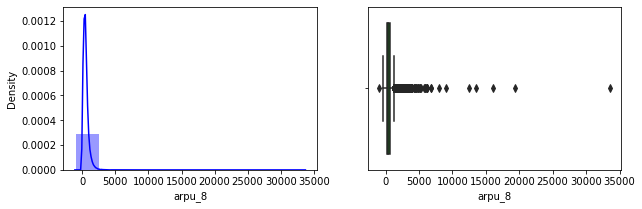

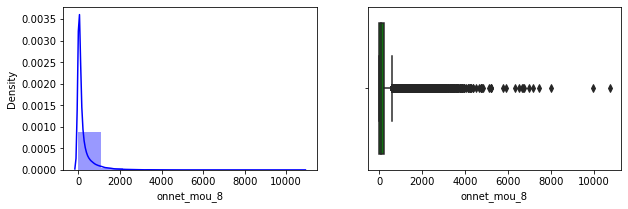

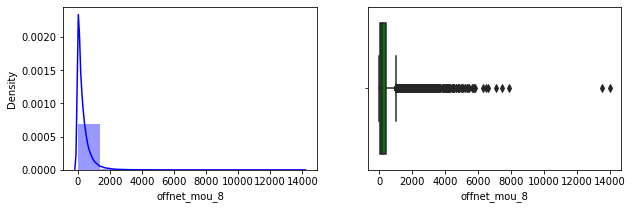

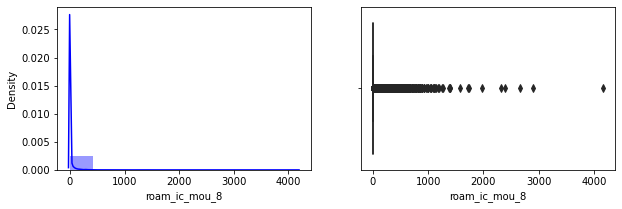

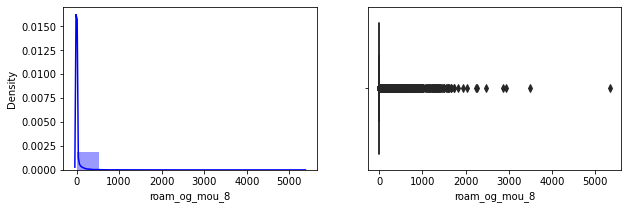

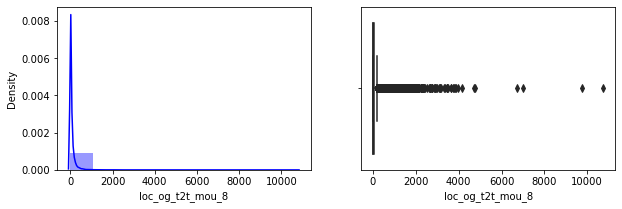

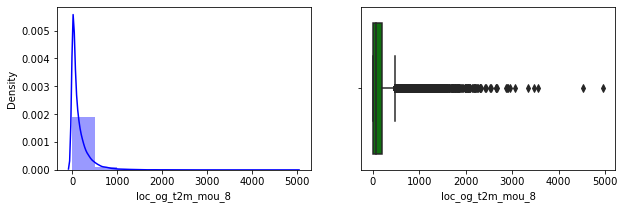

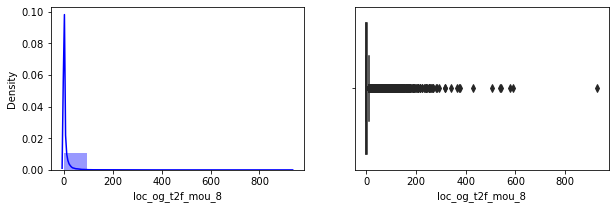

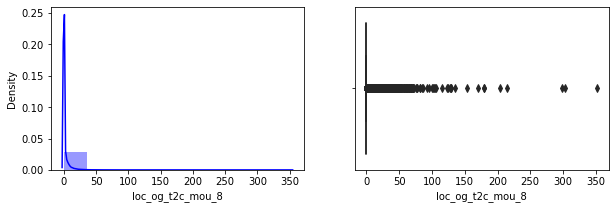

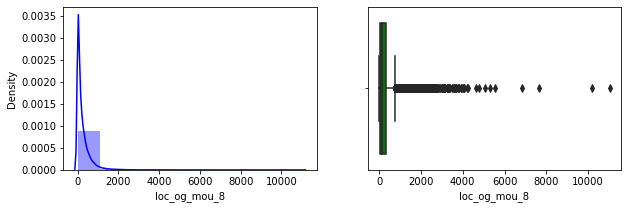

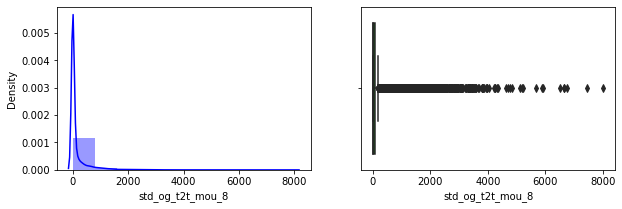

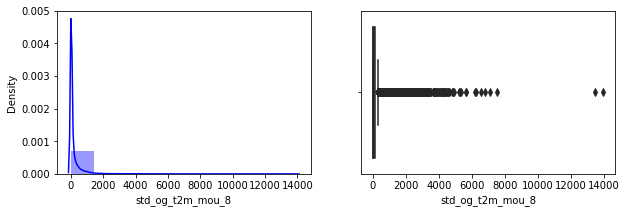

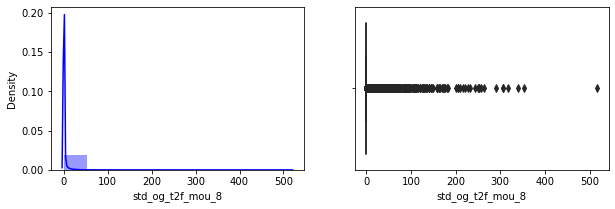

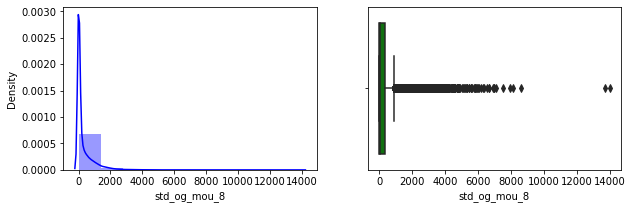

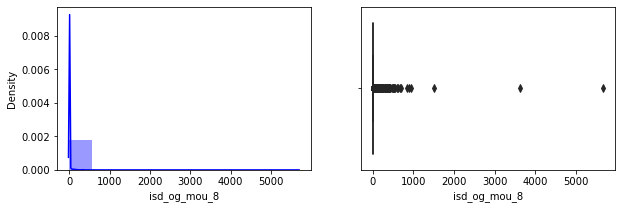

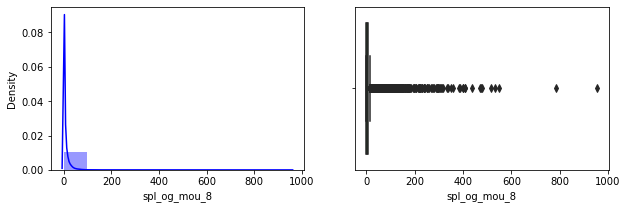

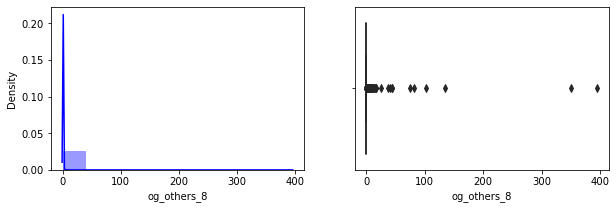

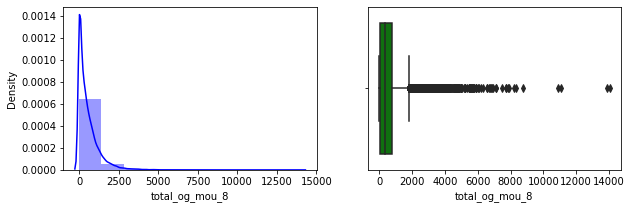

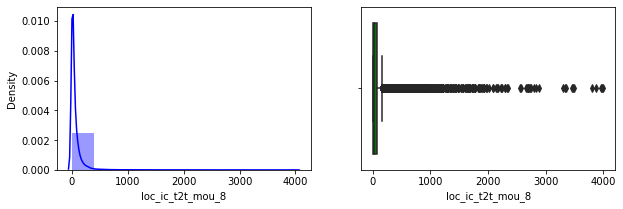

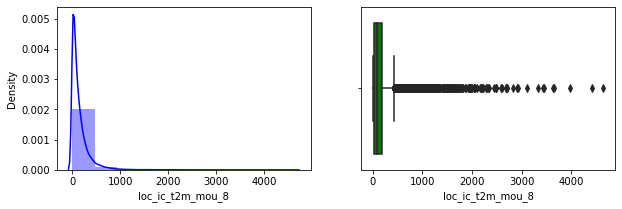

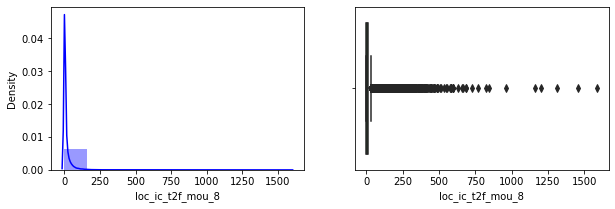

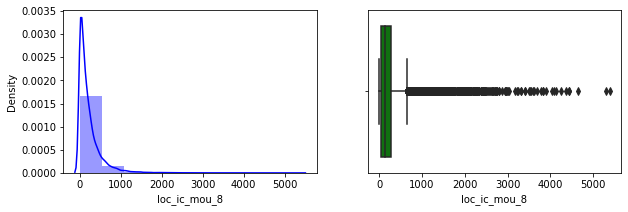

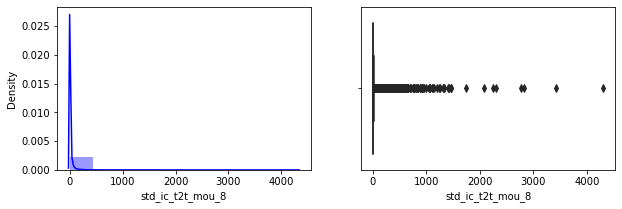

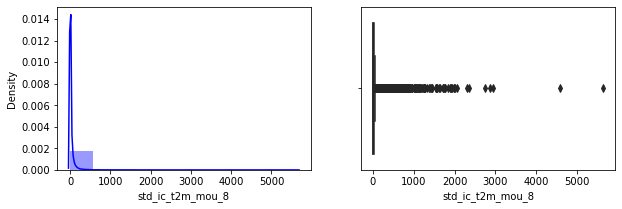

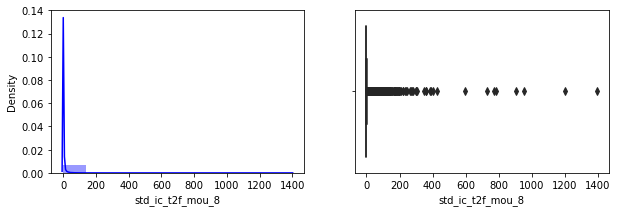

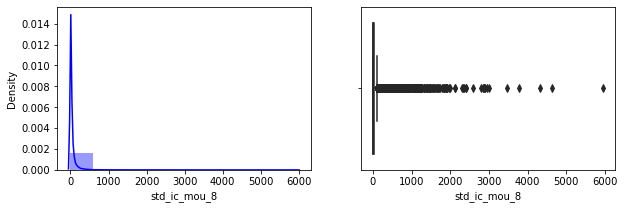

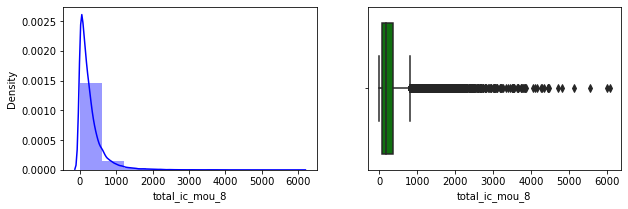

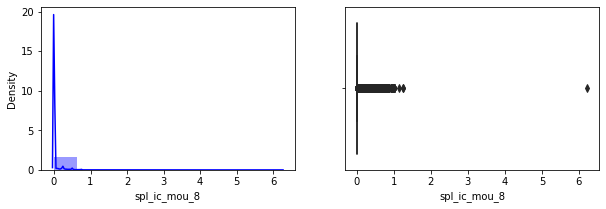

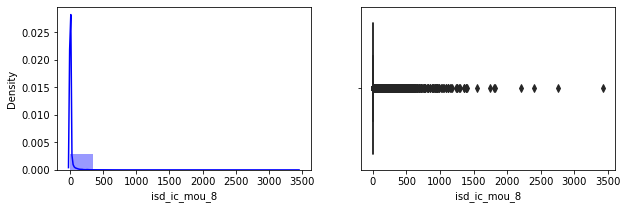

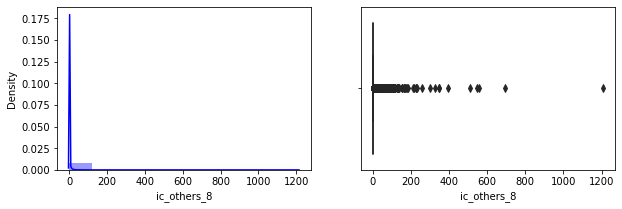

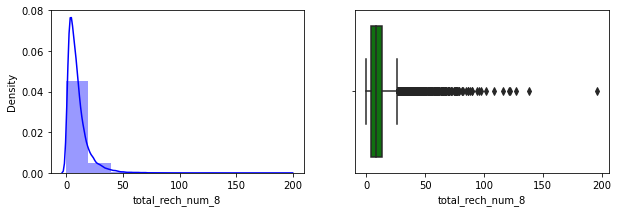

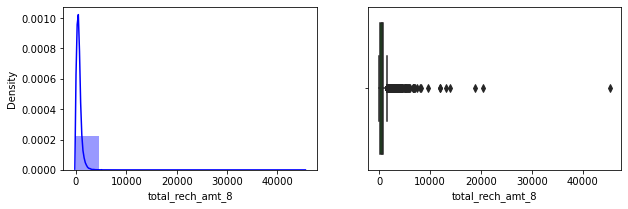

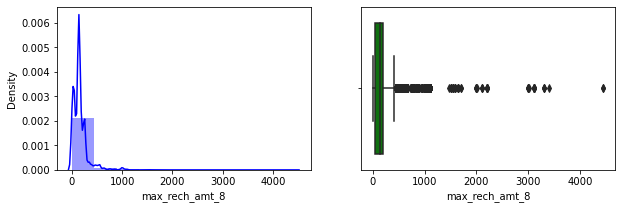

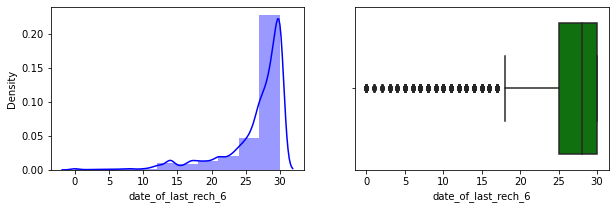

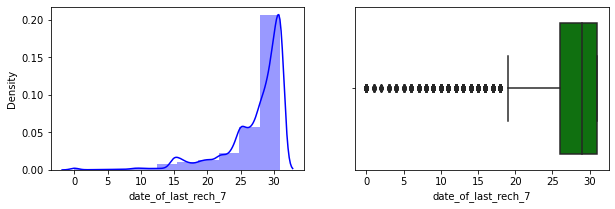

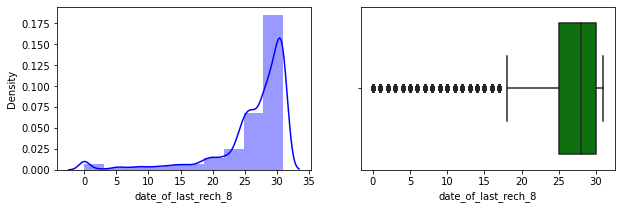

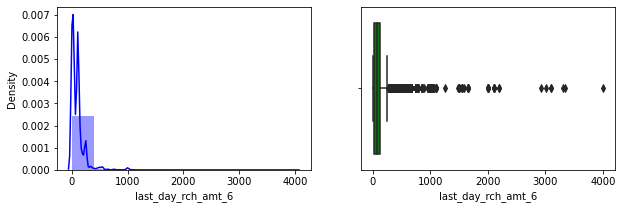

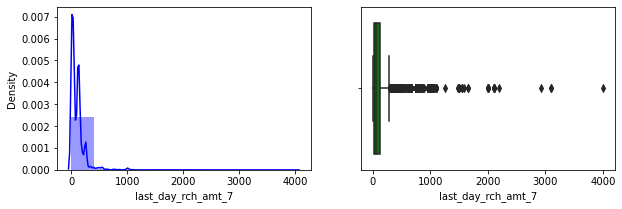

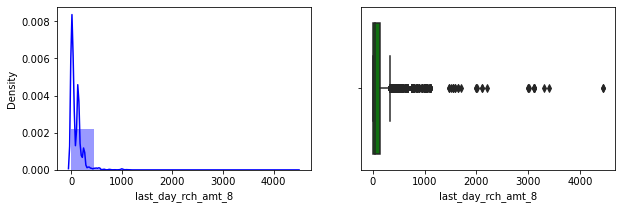

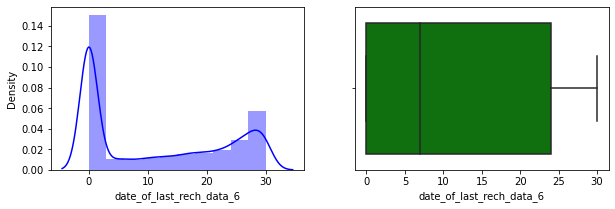

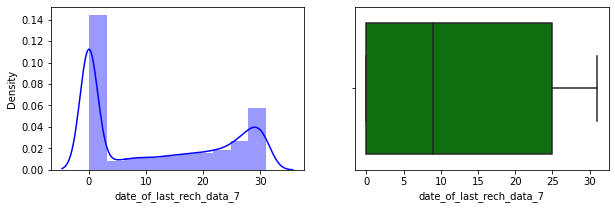

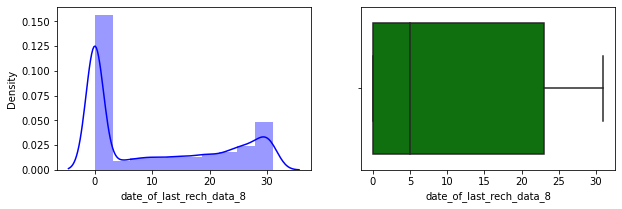

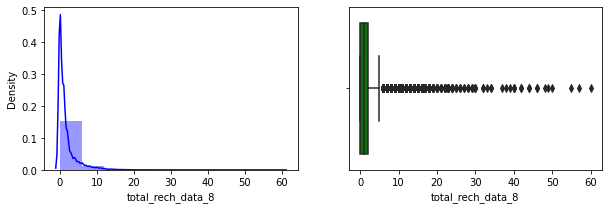

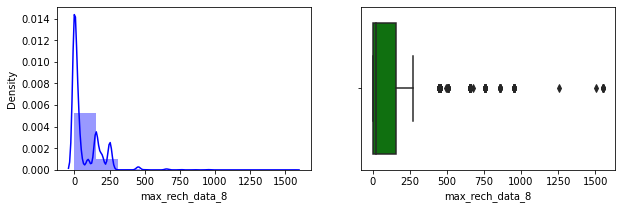

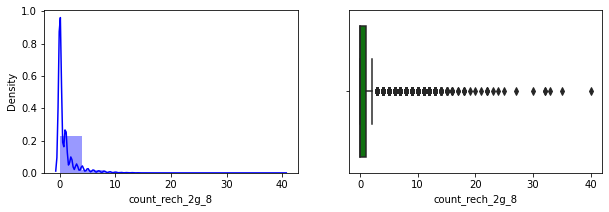

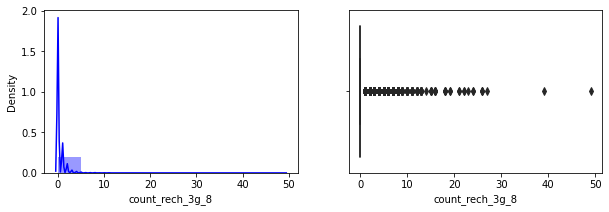

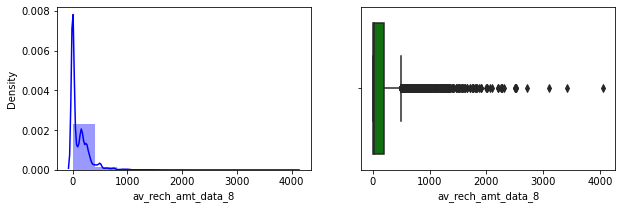

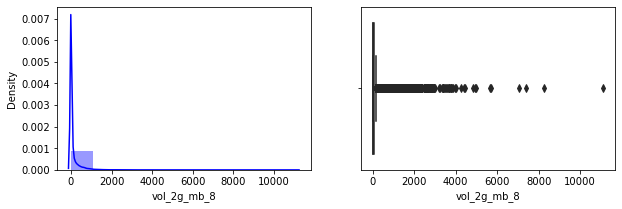

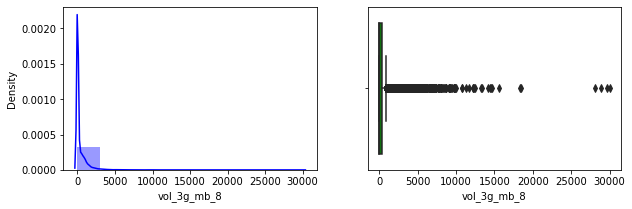

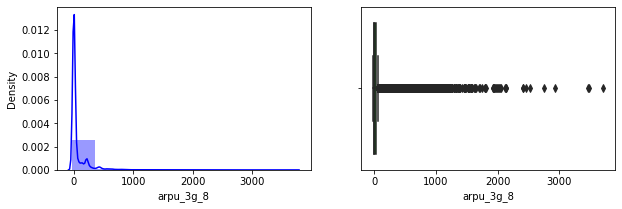

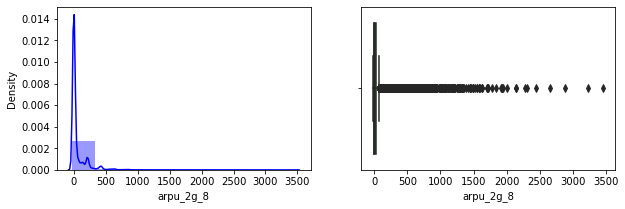

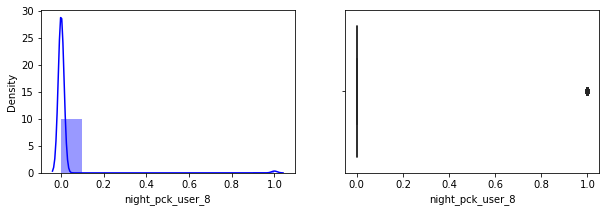

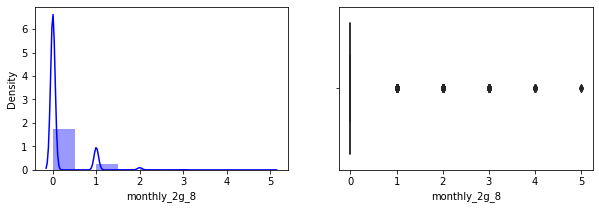

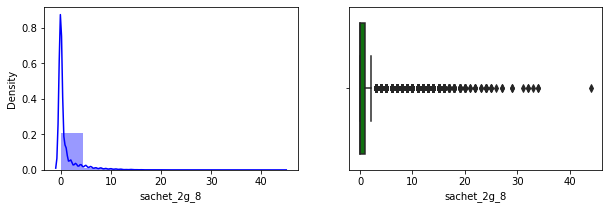

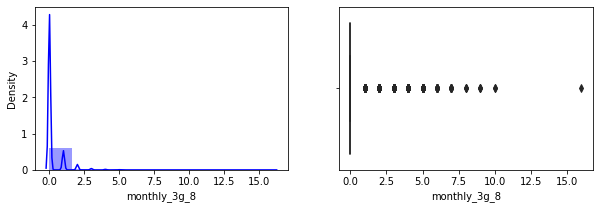

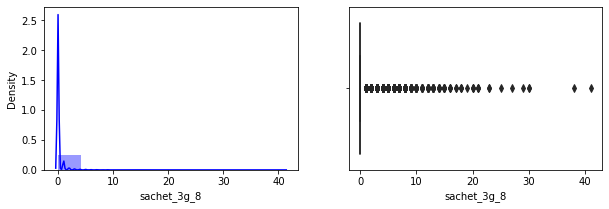

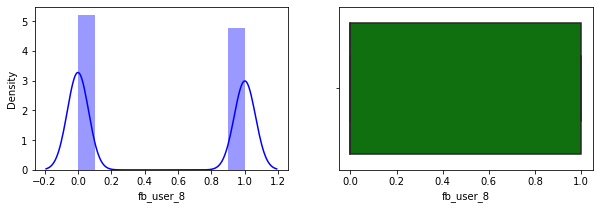

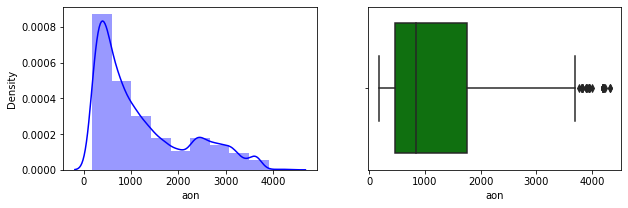

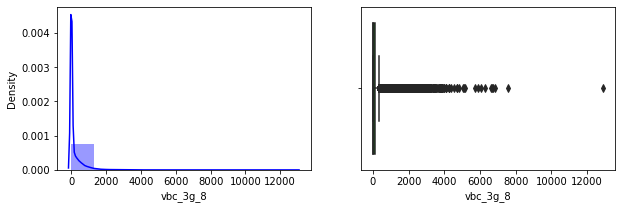

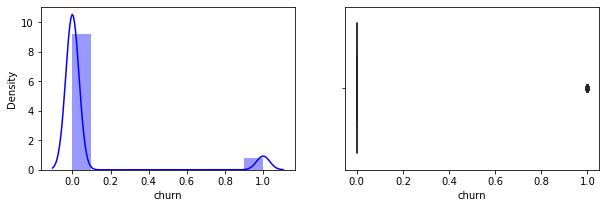

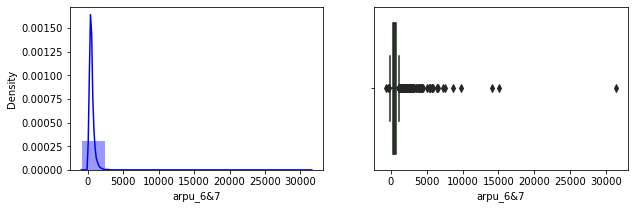

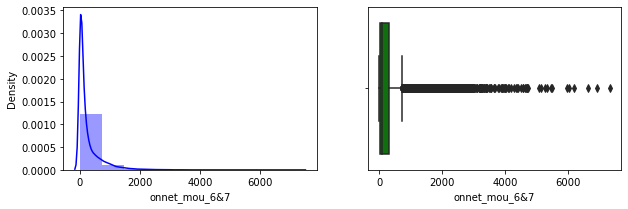

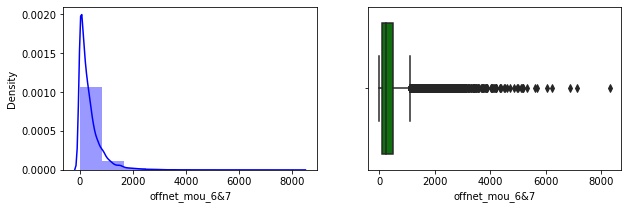

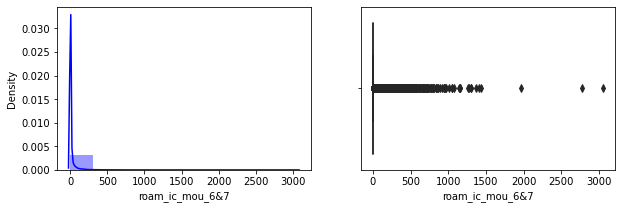

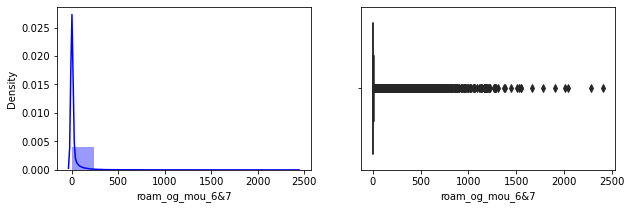

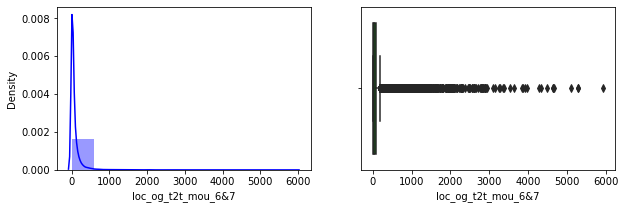

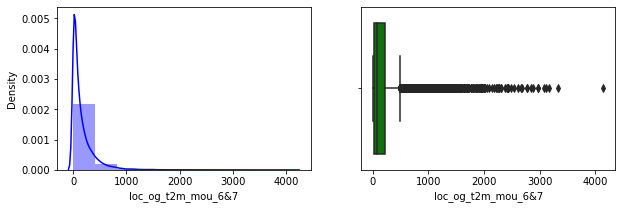

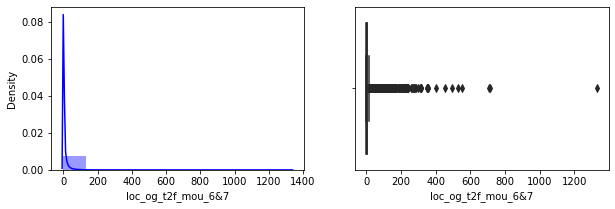

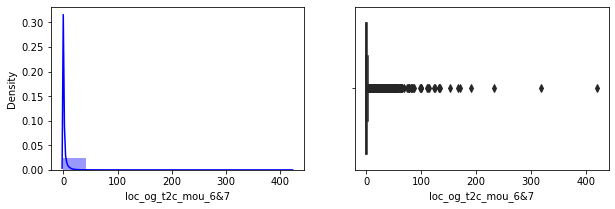

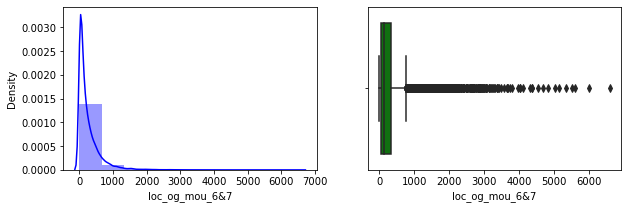

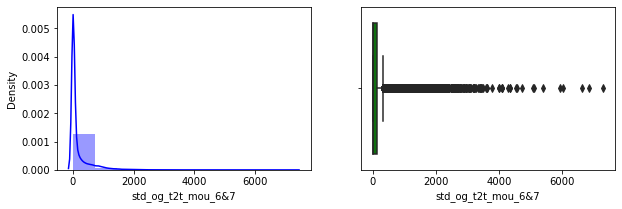

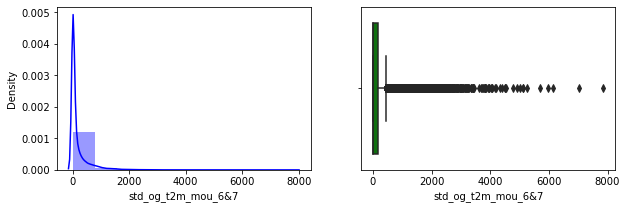

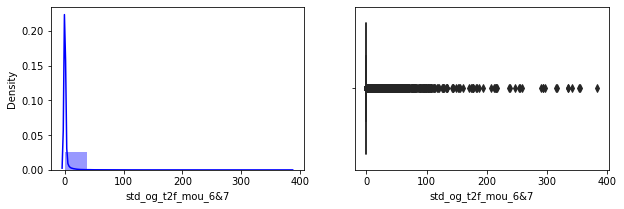

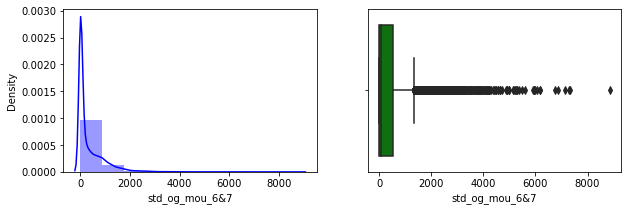

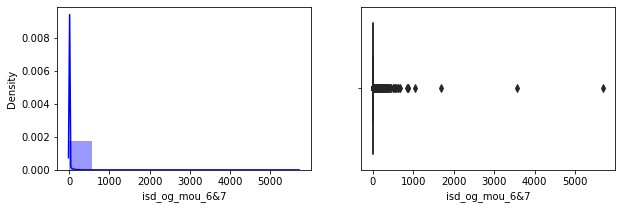

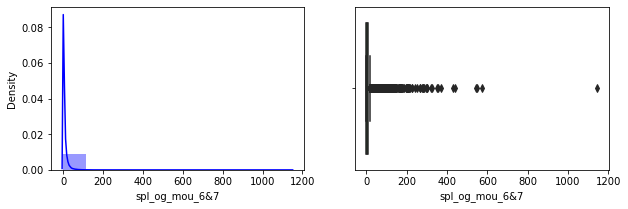

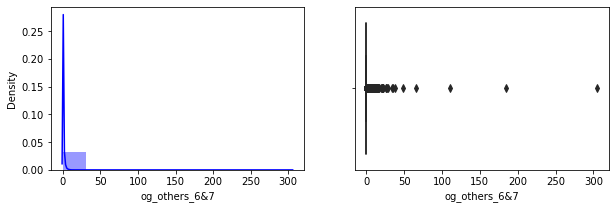

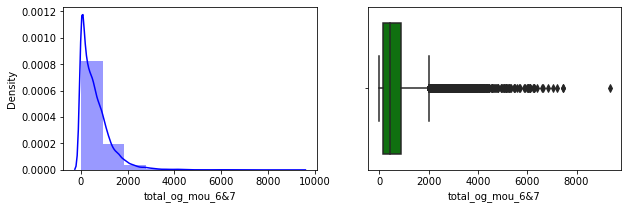

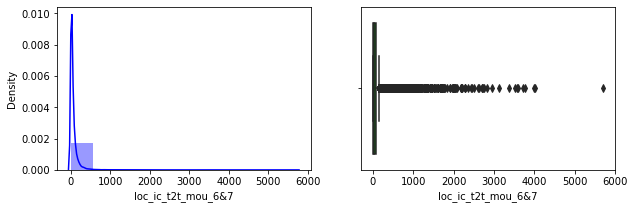

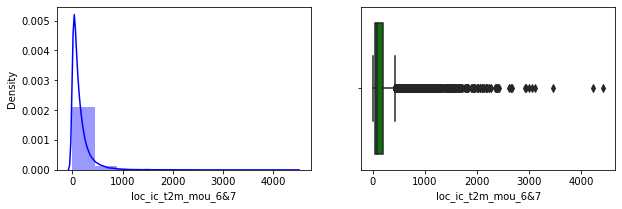

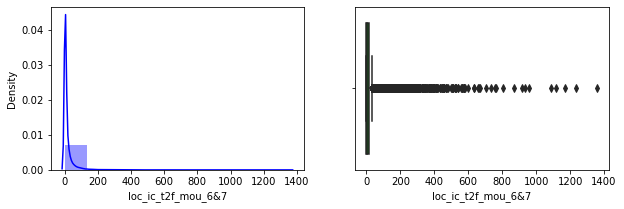

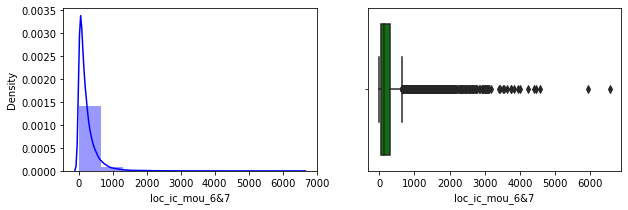

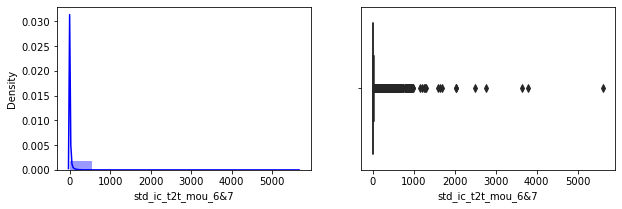

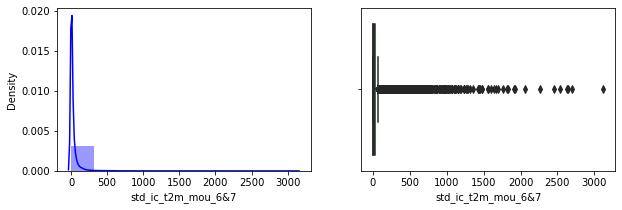

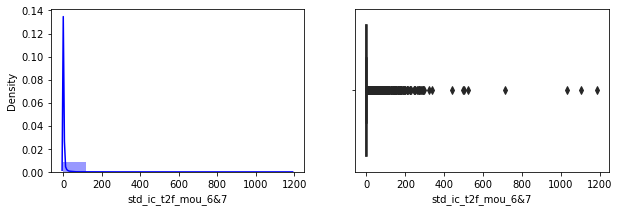

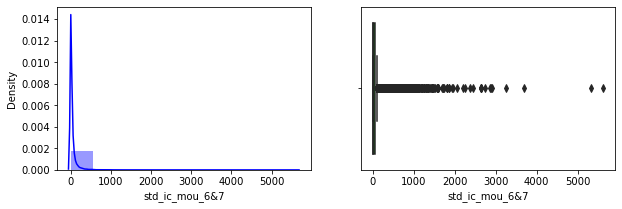

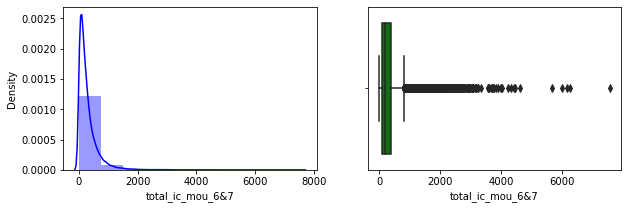

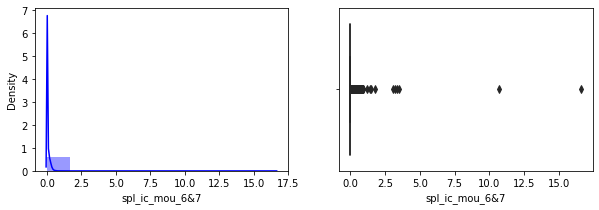

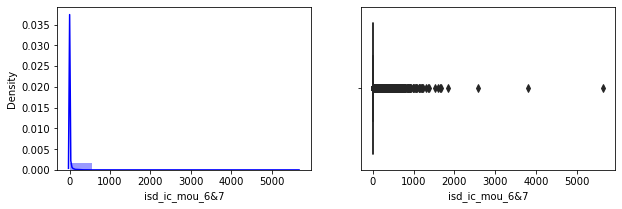

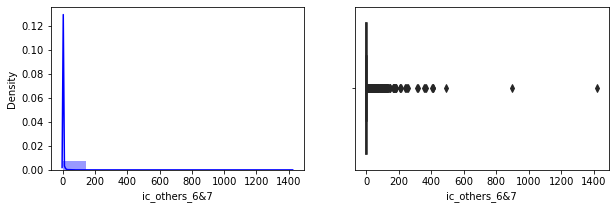

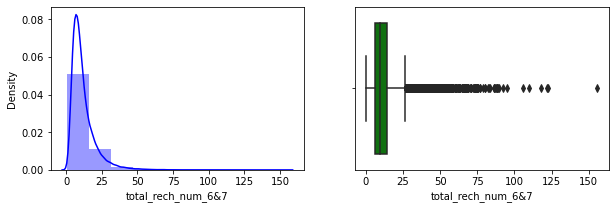

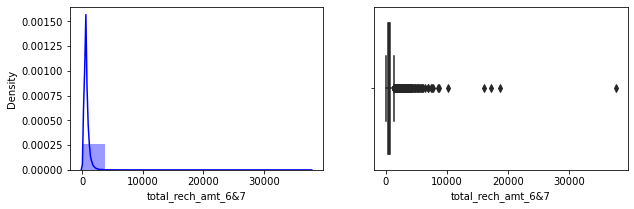

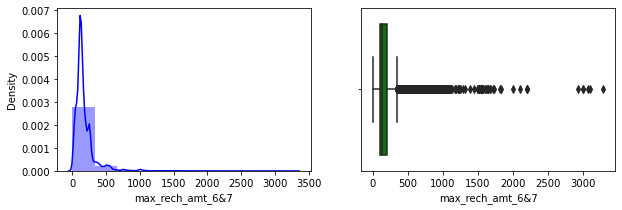

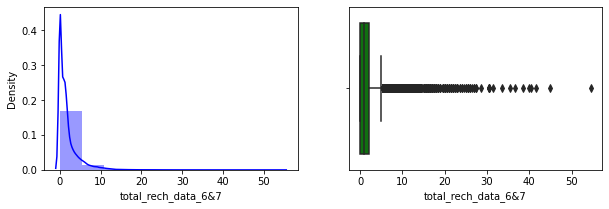

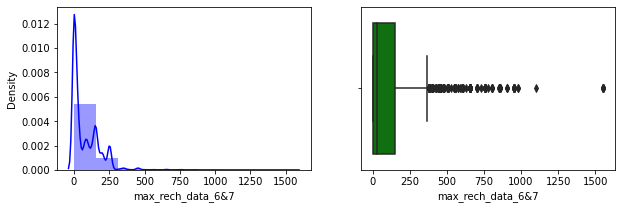

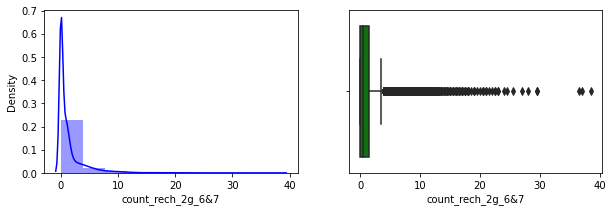

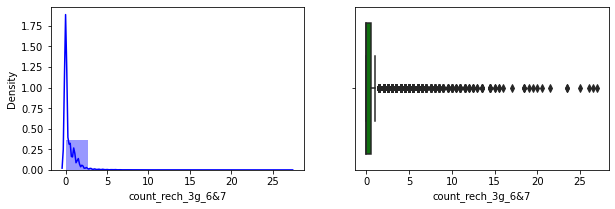

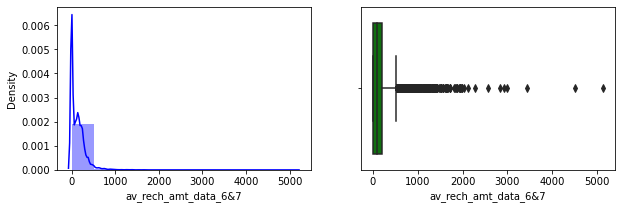

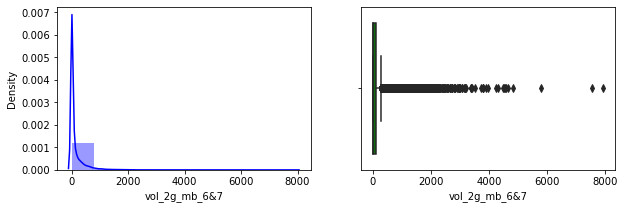

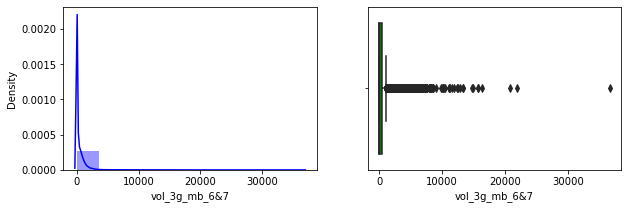

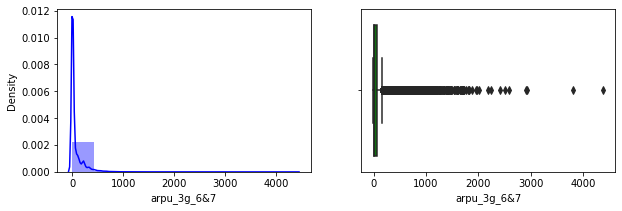

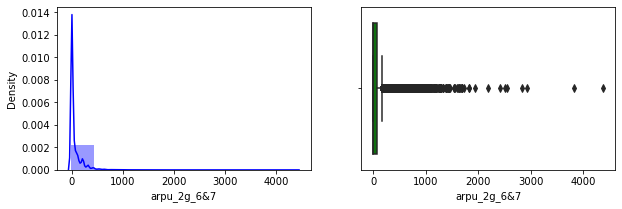

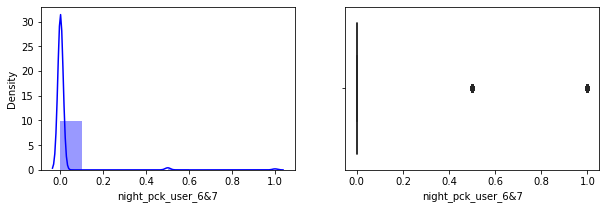

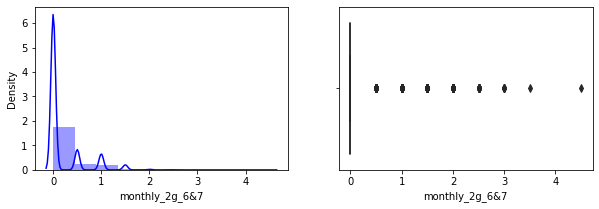

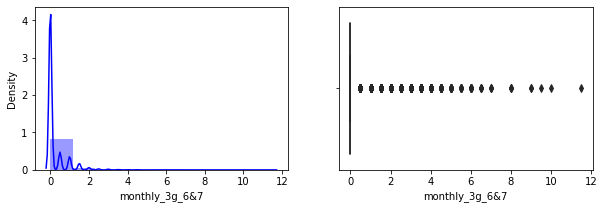

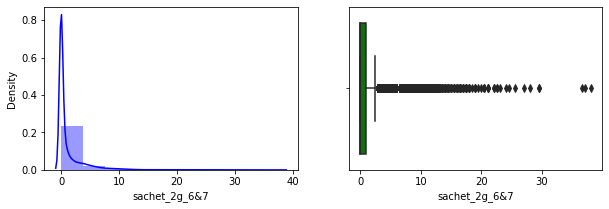

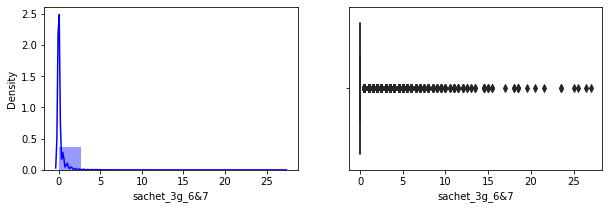

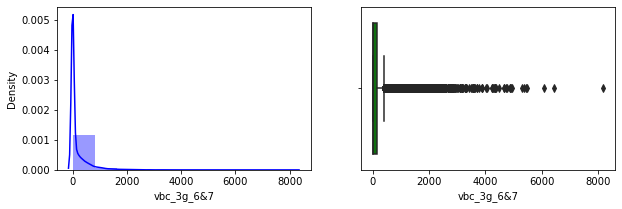

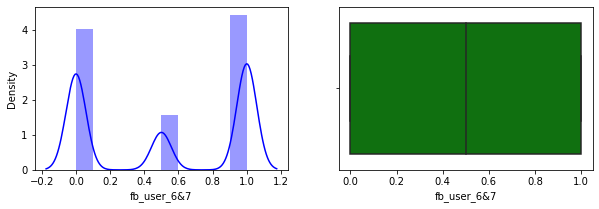

In [200]:
#univariate analysis
for i in df_num:
    univariate_quantative(i,i)
    

##### Observation:
we see that most of the variablesare skwed towards left have outliers but in telecom industry these outliers are possible,
so proceeding futher without removing the outliers for now 

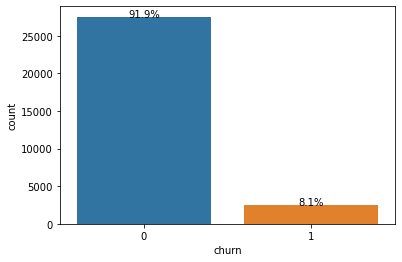

In [201]:
#distribution of churn and non-churn customers
ax=sns.countplot(df_70['churn'])
total = float(len(df_70))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
#Observation:    
#we find that only 8% customers have churned, there is a high class imbalance which we will handle later.

### Bivariate Analysis

In [202]:
#function for bivariate analysis
def bivariate(x,z):
    x6_7=x+"_6&7"
    #x7=x+"_7"
    x8=x+"_8"
    df_sample = df_70.groupby(['churn'])[x6_7,x8].mean()
    df_sample.plot.bar()
    plt.title('Distribution of '+ z +' across months')
    plt.show()

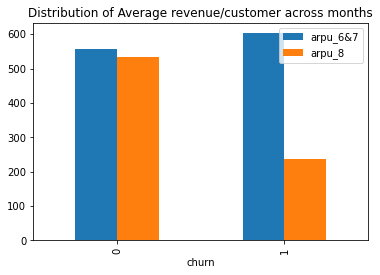

In [203]:
bivariate('arpu','Average revenue/customer')
#Observation:
#we find that for churned customers there is a significant decrease in average revenue from good phase to action phase.

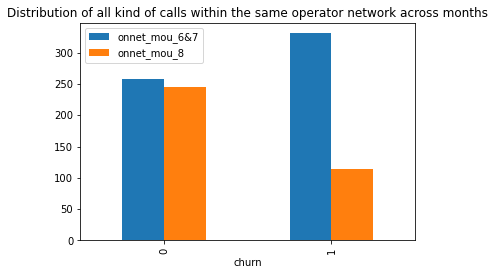

In [204]:
bivariate('onnet_mou','all kind of calls within the same operator network')
#Observation:
#we find that for churned customers there is a significant decrease in average number of calls within same network
#from good phase to action phase.Also the avearge number of customers in good phase is more for those who have churned. 

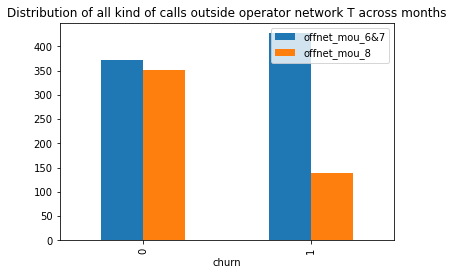

In [205]:
bivariate('offnet_mou','all kind of calls outside operator network T')
#Observation:
#we find that for churned customers there is a significant decrease in average number of calls outside operator network T
#good phase to action phase.

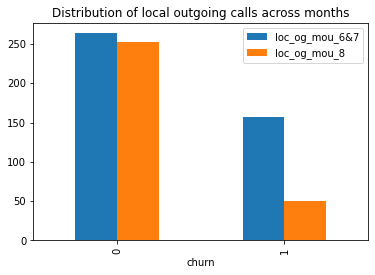

In [206]:
bivariate('loc_og_mou','local outgoing calls')
#Observation:
#we find that for churned customers there is a significant decrease in average number of local outgoing calls from
#good phase to action phase.

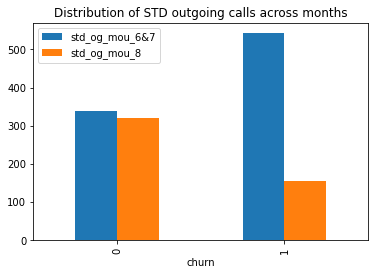

In [207]:
bivariate('std_og_mou','STD outgoing calls')
#Observation:
#we find that for churned customers there is a significant decrease in average number of STD outgoing calls 
#from good phase to action phase.

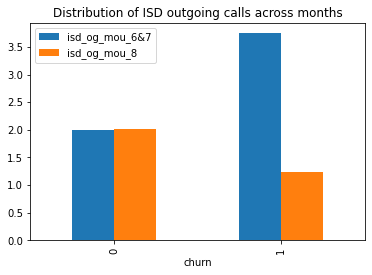

In [208]:
bivariate('isd_og_mou','ISD outgoing calls')
#Observation:
#we find that for churned customers there is a significant decrease in average number of ISD outgoing calls 
# from good phase to action phase.

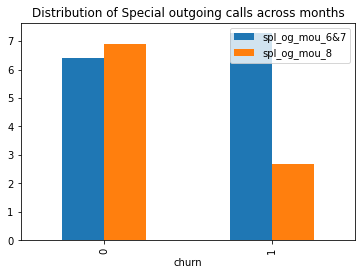

In [209]:
bivariate('spl_og_mou','Special outgoing calls')
#Observation:
#we find that for churned customers there is a significant decrease in average number of special calls 
#from good phase to action phase.

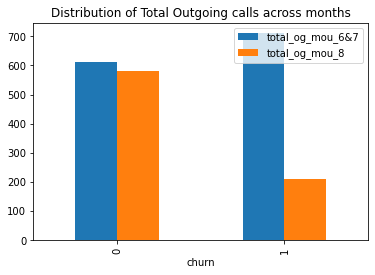

In [210]:
bivariate('total_og_mou','Total Outgoing calls')
#Observation:
#we find that for churned customers there is a significant decrease in average number of total outgoing calls from
#good phase to action phase.

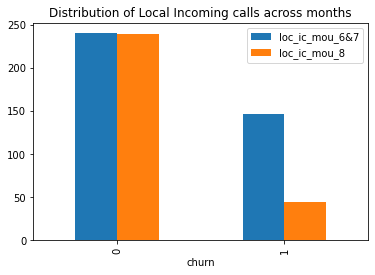

In [211]:
bivariate('loc_ic_mou','Local Incoming calls')
#Observation:
#we find that for churned customers there is a significant decrease in average number of local incoming calls
#from good phase to action phase.

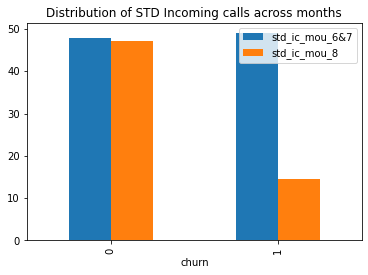

In [212]:
bivariate('std_ic_mou','STD Incoming calls')
#Observation:
#we find that for churned customers there is a significant decrease in average number of incoming STD calls
#from good phase to action phase.

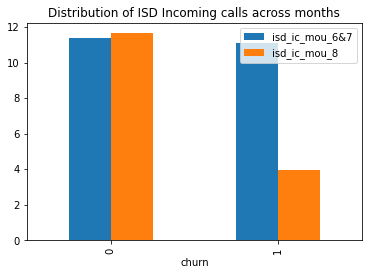

In [213]:
bivariate('isd_ic_mou','ISD Incoming calls')
#Observation:
#we find that for churned customers there is a significant decrease in average number of incoming ISD calls 
#from good phase to action phase.

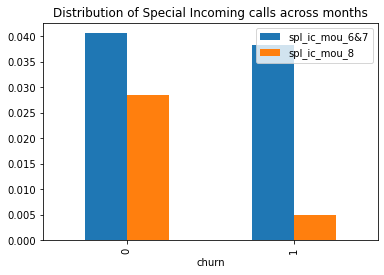

In [214]:
bivariate('spl_ic_mou','Special Incoming calls')
#Observation:
#we find that for churned customers there is a significant decrease in average number of incoming special calls
#from good phase to action phase.

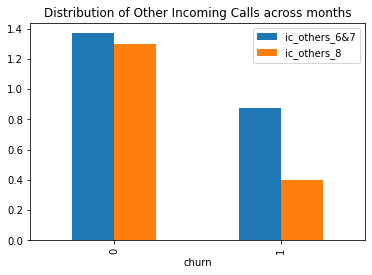

In [215]:
bivariate('ic_others','Other Incoming Calls')
#Observation:
#we find that for churned customers there is a significant decrease in average number of other incoming calls 
#from good phase to action phase.

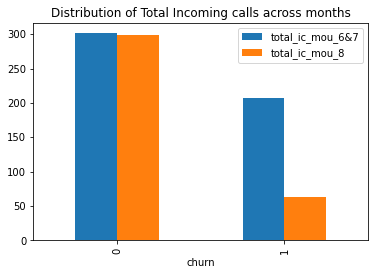

In [216]:
bivariate('total_ic_mou','Total Incoming calls')
#Observation:
#we find that for churned customers there is a significant decrease in average number of total incoming calls
 #from good phase to action phase.

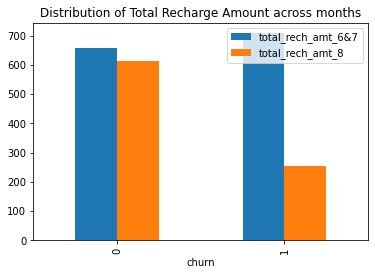

In [217]:
bivariate('total_rech_amt','Total Recharge Amount')
#Observation:
#we find that for churned customers there is a significant decrease in average of total recharge amount
#from good phase to action phase.

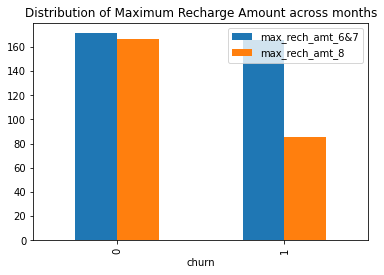

In [218]:
bivariate('max_rech_amt','Maximum Recharge Amount')
#Observation:
#we find that for churned customers there is a significant decrease in average of maximum recharge amount 
#from good phase to action phase.

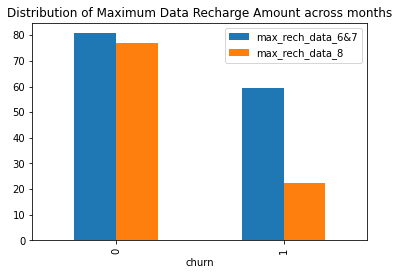

In [219]:
bivariate('max_rech_data','Maximum Data Recharge Amount')
#Observation:
#we find that for churned customers there is a significant decrease in average of maximum data recharge amount
#from good phase to action phase.

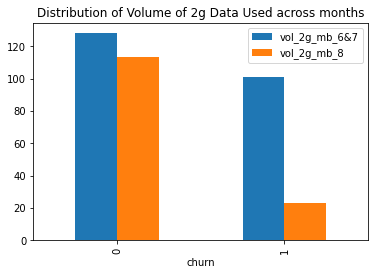

In [220]:
bivariate('vol_2g_mb','Volume of 2g Data Used')
#Observation:
#we find that for churned customers there is a significant decrease in average of volume of 2g data used 
#from good phase to action phase.

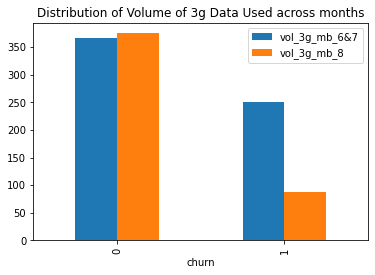

In [221]:
bivariate('vol_3g_mb','Volume of 3g Data Used')
#Observation:
#we find that for churned customers there is a significant decrease in average of volume of 3g data used 
#from good phase to action phase.

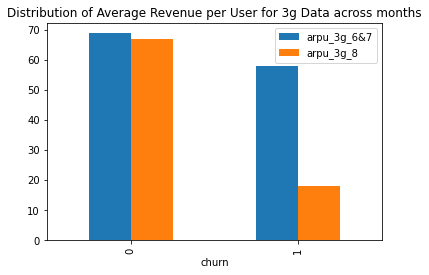

In [222]:
bivariate('arpu_3g','Average Revenue per User for 3g Data')
#Observation:
#we find that for churned customers there is a significant decrease in average revenue per user for 3g data 
#from good phase to action phase.

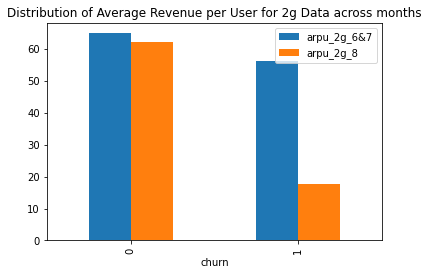

In [223]:
bivariate('arpu_2g','Average Revenue per User for 2g Data')
#Observation:
#we find that for churned customers there is a significant decrease in average revenue per user for 2g data
#from good phase to action phase.

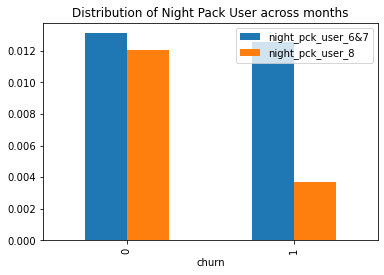

In [224]:
bivariate('night_pck_user','Night Pack User')
#Observation:
#we find that for churned customers there is a significant decrease in average night pack users per month.

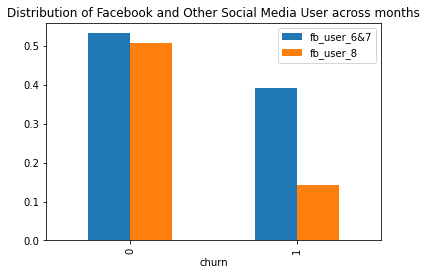

In [225]:
bivariate('fb_user','Facebook and Other Social Media User')
#Observation:
#we find that for churned customers there is a significant decrease in average number of facebook and other 
#social media users per month.

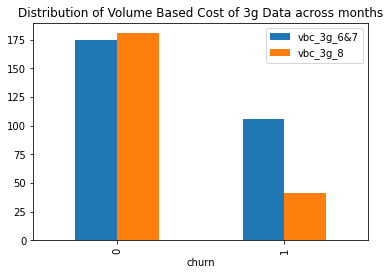

In [226]:
bivariate('vbc_3g','Volume Based Cost of 3g Data')
#Observation:
#we find that for churned customers there is a significant decrease in average volume based cost for 3g data
#from good phase to action phase.

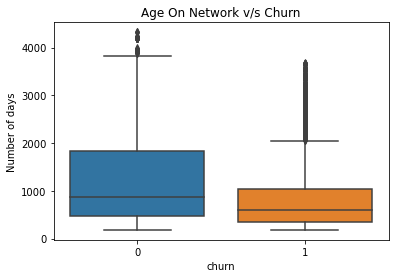

In [227]:
ax=sns.boxplot(y='aon',x='churn',data=df_70)
ax.set_title("Age On Network v/s Churn")
ax.set_xlabel('churn')
ax.set_ylabel('Number of days')
plt.show()
#Observation:
#we find that the customers that have churned were not using the services from very long whereas 
#the customers who are using the service from long time have not churned.
#i.e. new customers are more likely to churn

###### Finding from how long customers have been using the service

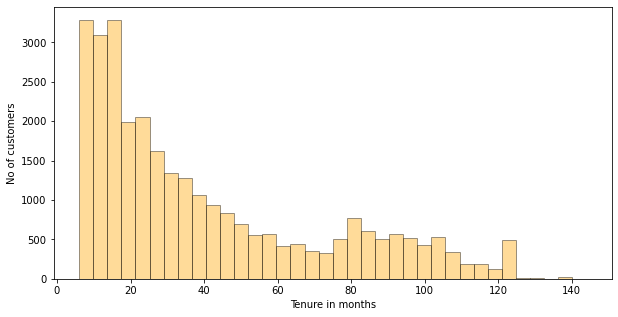

In [228]:
plt.figure(figsize=(10,5))
tenure_data = df_70[['aon','churn']]
tenure_data['tenure'] = tenure_data['aon']/30
ax = sns.distplot(tenure_data['tenure'],hist=True,kde=False,bins=int(180/5),color='orange',
            hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':5})
ax.set_xlabel('Tenure in months')
ax.set_ylabel('No of customers')
plt.show()
#Observation:
#we find that a good amount of people have been using the services from very long time

### Train Test Split

In [229]:
#importing the library for train_test_split
from sklearn.model_selection import train_test_split

In [230]:
y=df_70.pop('churn')

In [231]:
X=df_70.copy()

In [232]:
#shape of our independent variables
X.shape

(29953, 108)

In [233]:
#shape of out label
y.shape

(29953,)

In [234]:
#train_test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [235]:
X_train.shape

(20967, 108)

In [236]:
X_test.shape

(8986, 108)

In [237]:
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,vbc_3g_8,arpu_6&7,onnet_mou_6&7,offnet_mou_6&7,roam_ic_mou_6&7,roam_og_mou_6&7,loc_og_t2t_mou_6&7,loc_og_t2m_mou_6&7,loc_og_t2f_mou_6&7,loc_og_t2c_mou_6&7,loc_og_mou_6&7,std_og_t2t_mou_6&7,std_og_t2m_mou_6&7,std_og_t2f_mou_6&7,std_og_mou_6&7,isd_og_mou_6&7,spl_og_mou_6&7,og_others_6&7,total_og_mou_6&7,loc_ic_t2t_mou_6&7,loc_ic_t2m_mou_6&7,loc_ic_t2f_mou_6&7,loc_ic_mou_6&7,std_ic_t2t_mou_6&7,std_ic_t2m_mou_6&7,std_ic_t2f_mou_6&7,std_ic_mou_6&7,total_ic_mou_6&7,spl_ic_mou_6&7,isd_ic_mou_6&7,ic_others_6&7,total_rech_num_6&7,total_rech_amt_6&7,max_rech_amt_6&7,total_rech_data_6&7,max_rech_data_6&7,count_rech_2g_6&7,count_rech_3g_6&7,av_rech_amt_data_6&7,vol_2g_mb_6&7,vol_3g_mb_6&7,arpu_3g_6&7,arpu_2g_6&7,night_pck_user_6&7,monthly_2g_6&7,monthly_3g_6&7,sachet_2g_6&7,sachet_3g_6&7,vbc_3g_6&7,fb_user_6&7
16686,657.427,145.96,1211.56,0.00,0.00,72.49,185.83,6.09,8.43,264.43,73.46,958.33,53.69,1085.49,4.8,8.43,0.0,1363.16,0.00,78.03,41.96,119.99,61.39,215.19,3.91,280.51,494.41,0.11,93.78,0.0,9,885,144,26,27,28,128,128,130,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0.0,498,0.00,720.2055,205.870,670.985,402.145,583.055,13.020,39.490,21.955,0.500,74.475,95.655,122.910,0.75,219.320,0.0,0.500,0.465,294.765,0.625,76.590,7.390,84.610,5.670,30.535,0.00,36.210,130.855,0.000,10.02,0.000,7.5,858.0,128.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
84709,26.508,4.11,2.69,7.11,6.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,4,30,30,29,25,26,50,7,30,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0.0,189,0.00,458.3645,217.435,462.525,1.045,0.500,29.885,37.815,1.875,0.105,69.585,187.540,408.125,3.79,599.465,0.0,28.155,1.890,699.110,205.240,44.150,1.830,251.235,21.245,146.375,28.43,196.060,451.995,0.015,0.00,4.675,11.5,492.0,80.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
33699,167.601,5.09,72.63,0.00,0.00,5.09,72.63,0.00,0.00,77.73,0.00,0.00,0.00,0.00,0.0,0.01,0.0,77.74,8.09,111.28,0.40,119.78,6.39,0.00,0.00,6.39,126.18,0.00,0.00,0.0,16,195,30,28,30,31,17,10,10,28,20,29,5.0,25.0,5.0,0.0,125.0,405.69,0.00,0.0,7.91,0.0,0,5,0,0,1.0,885,0.00,147.1335,0.620,22.245,0.000,0.000,0.130,19.555,0.350,0.000,20.035,0.490,2.340,0.00,2.830,0.0,0.000,0.000,22.865,106.235,31.210,2.320,139.780,0.965,0.900,0.00,1.865,142.060,0.065,0.00,0.345,13.0,172.5,18.5,8.0,17.0,8.0,0.0,133.0,442.44,0.000,0.000,3.050,0.0,0.0,0.0,8.0,0.0,0.000,1.0
25535,859.527,1471.41,342.94,0.00,0.00,50.29,181.01,0.00,0.00,231.31,1421.11,161.93,0.00,1583.04,0.0,1.79,0.0,1816.16,189.19,137.36,52.74,379.31,0.00,13.03,0.00,13.03,392.34,0.00,0.00,0.0,9,876,250,29,31,28,0,130,130,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0.0,279,0.00,902.6285,1513.630,296.325,0.000,0.000,108.820,241.995,0.465,0.000,351.285,1404.800,53.860,0.00,1458.670,0.0,1.255,0.000,1811.220,116.255,221.675,39.590,377.535,2.345,24.385,0.00,26.735,404.280,0.000,0.00,0.000,16.0,1098.0,200.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
49976,182.000,25.99,188.79,0

### Scaling the Features

In [238]:
#importing libraries for feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [239]:
#instantiating an object of StandardScaler
scaler=StandardScaler()

In [240]:
#taking all the data in X_train to scale them
var=X_train.columns

In [241]:
var

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       ...
       'vol_3g_mb_6&7', 'arpu_3g_6&7', 'arpu_2g_6&7', 'night_pck_user_6&7',
       'monthly_2g_6&7', 'monthly_3g_6&7', 'sachet_2g_6&7', 'sachet_3g_6&7',
       'vbc_3g_6&7', 'fb_user_6&7'],
      dtype='object', length=108)

In [242]:
#scaling the train data
X_train[var]=scaler.fit_transform(X_train[var])

In [243]:
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,vbc_3g_8,arpu_6&7,onnet_mou_6&7,offnet_mou_6&7,roam_ic_mou_6&7,roam_og_mou_6&7,loc_og_t2t_mou_6&7,loc_og_t2m_mou_6&7,loc_og_t2f_mou_6&7,loc_og_t2c_mou_6&7,loc_og_mou_6&7,std_og_t2t_mou_6&7,std_og_t2m_mou_6&7,std_og_t2f_mou_6&7,std_og_mou_6&7,isd_og_mou_6&7,spl_og_mou_6&7,og_others_6&7,total_og_mou_6&7,loc_ic_t2t_mou_6&7,loc_ic_t2m_mou_6&7,loc_ic_t2f_mou_6&7,loc_ic_mou_6&7,std_ic_t2t_mou_6&7,std_ic_t2m_mou_6&7,std_ic_t2f_mou_6&7,std_ic_mou_6&7,total_ic_mou_6&7,spl_ic_mou_6&7,isd_ic_mou_6&7,ic_others_6&7,total_rech_num_6&7,total_rech_amt_6&7,max_rech_amt_6&7,total_rech_data_6&7,max_rech_data_6&7,count_rech_2g_6&7,count_rech_3g_6&7,av_rech_amt_data_6&7,vol_2g_mb_6&7,vol_3g_mb_6&7,arpu_3g_6&7,arpu_2g_6&7,night_pck_user_6&7,monthly_2g_6&7,monthly_3g_6&7,sachet_2g_6&7,sachet_3g_6&7,vbc_3g_6&7,fb_user_6&7
16686,0.285056,-0.190303,1.783571,-0.161348,-0.198865,-0.021305,0.150866,0.008432,0.893426,0.086450,-0.186320,1.907658,4.465703,1.266718,0.055469,0.092805,-0.01669,1.158255,-0.407631,-0.313531,0.623622,-0.332277,0.709123,1.732992,0.068081,1.673128,0.594904,0.800539,1.144225,-0.089865,-0.102590,0.471414,-0.093044,-0.081787,-0.032296,0.294306,0.181700,0.198366,0.263260,-0.959817,-0.983431,-0.906730,-0.541994,-0.657966,-0.480932,-0.344710,-0.628234,-0.331949,-0.395370,-0.371856,-0.385124,-0.109629,-0.378158,-0.415216,-0.341319,-0.186735,-0.959470,-0.745158,-0.406953,0.366646,-0.129522,0.636108,5.539233,5.870690,-0.326171,-0.532320,0.791008,-0.179047,-0.503432,-0.191798,-0.153802,-0.093983,-0.232048,-0.043735,-0.326961,0.048366,-0.492486,-0.423848,-0.356632,-0.182219,-0.489771,-0.131541,0.007369,-0.155370,-0.085954,-0.460179,-0.420519,-0.023803,-0.089618,-0.494738,0.373023,-0.276466,-0.649876,-0.769529,-0.550017,-0.404132,-0.759111,-0.417798,-0.451127,-0.428710,-0.448728,-0.136429,-0.464895,-0.3974,-0.471912,-0.234903,-0.434737,-1.141873
84709,-0.923819,-0.506983,-0.677955,-0.069335,-0.130035,-0.358504,-0.646728,-0.301658,-0.228322,-0.657020,-0.373061,-0.378736,-0.141347,-0.499874,-0.039759,-0.319465,-0.01669,-0.782041,-0.407631,-0.671136,-0.329743,-0.722697,-0.205485,-0.258252,-0.132790,-0.313698,-0.770418,-0.251626,-0.156932,-0.089865,-0.642013,-0.870995,-0.761021,0.537059,-0.444190,-0.017717,-0.351320,-0.662024,-0.435970,-0.959817,-0.983431,-0.906730,-0.541994,-0.657966,-0.480932,-0.344710,-0.628234,-0.331949,-0.395370,-0.371856,-0.385124,-0.109629,-0.378158,-0.415216,-0.341319,-0.186735,-0.959470,-1.067043,-0.406953,-0.228623,-0.102873,0.186980,-0.193197,-0.240134,-0.248877,-0.539612,-0.230512,-0.236065,-0.517270,0.049287,0.557523,0.154782,0.416968,-0.043735,1.188167,0.634726,0.126201,0.928691,-0.512260,-0.302912,0.065923,0.085867,1.227525,1.448343,1.111208,0.455986,-0.260722,-0.169672,0.231977,-0.028476,-0.316159,-0.586640,-0.649876,-0.769529,-0.550017,-0.404132,-0.759111,-0.417798,-0.451127,-0.428710,-0.448728,-0.136429,-0.464895,-0.3974,-0.471912,-0.234903,-0.434737,-1.141873
33699,-0.653477,-0.504795,-0.535542,-0.161348,-0.198865,-0.334827,-0.334996,-0.301658,-0.228322,-0.438474,-0.373061,-0.378736,-0.141347,-0.499874,-0.039759,-0.318976,-0.01669,-0.67138

In [244]:
#scaling the test data
#we do not fit the test data , we only transform them
X_test[var]=scaler.transform(X_test[var])

In [245]:
X_test.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,vbc_3g_8,arpu_6&7,onnet_mou_6&7,offnet_mou_6&7,roam_ic_mou_6&7,roam_og_mou_6&7,loc_og_t2t_mou_6&7,loc_og_t2m_mou_6&7,loc_og_t2f_mou_6&7,loc_og_t2c_mou_6&7,loc_og_mou_6&7,std_og_t2t_mou_6&7,std_og_t2m_mou_6&7,std_og_t2f_mou_6&7,std_og_mou_6&7,isd_og_mou_6&7,spl_og_mou_6&7,og_others_6&7,total_og_mou_6&7,loc_ic_t2t_mou_6&7,loc_ic_t2m_mou_6&7,loc_ic_t2f_mou_6&7,loc_ic_mou_6&7,std_ic_t2t_mou_6&7,std_ic_t2m_mou_6&7,std_ic_t2f_mou_6&7,std_ic_mou_6&7,total_ic_mou_6&7,spl_ic_mou_6&7,isd_ic_mou_6&7,ic_others_6&7,total_rech_num_6&7,total_rech_amt_6&7,max_rech_amt_6&7,total_rech_data_6&7,max_rech_data_6&7,count_rech_2g_6&7,count_rech_3g_6&7,av_rech_amt_data_6&7,vol_2g_mb_6&7,vol_3g_mb_6&7,arpu_3g_6&7,arpu_2g_6&7,night_pck_user_6&7,monthly_2g_6&7,monthly_3g_6&7,sachet_2g_6&7,sachet_3g_6&7,vbc_3g_6&7,fb_user_6&7
48388,10.893526,-0.134222,1.464597,2.560094,2.210581,-0.313429,0.721495,0.130634,1.239398,0.290431,-0.004993,0.828031,-0.141347,0.558968,-0.039759,-0.319465,-0.01669,0.623676,-0.292899,0.269324,-0.277486,0.008524,1.738895,3.252126,-0.132790,3.297734,1.258773,-0.251626,-0.156932,-0.075362,0.221064,8.563552,5.215620,0.743341,0.585544,0.762339,6.482280,2.843531,1.102335,-0.959817,-0.983431,-0.906730,-0.541994,-0.657966,-0.480932,0.490456,-0.628234,-0.331949,-0.395370,-0.371856,-0.385124,-0.109629,-0.378158,-0.415216,-0.341319,-0.186735,-0.959470,-1.001416,-0.406953,15.192467,-0.217224,0.866629,8.821195,6.813346,-0.385018,-0.225523,-0.311145,-0.169664,-0.401655,-0.323642,-0.168492,-0.155356,-0.329176,-0.043735,-0.354354,-0.142972,-0.525987,-0.427979,-0.296280,-0.320820,-0.471195,0.713801,0.746583,-0.141268,0.895030,-0.099222,-0.420519,-0.169672,-0.089618,-0.145041,11.750173,5.681464,-0.649876,-0.769529,-0.550017,-0.404132,-0.759111,-0.417798,-0.451127,-0.428710,-0.448728,-0.136429,-0.464895,-0.3974,-0.471912,-0.234903,-0.434737,-1.141873
29754,0.203382,-0.471932,-0.074827,-0.161348,-0.198865,-0.266354,0.586553,-0.251249,-0.228322,0.209401,-0.373061,-0.378736,-0.141347,-0.499874,0.099313,-0.146830,-0.01669,-0.328395,-0.284899,1.961475,0.610671,1.341043,-0.205485,-0.249646,-0.132790,-0.307111,0.983671,-0.251626,-0.156932,-0.089865,-0.318359,0.312837,0.697982,-1.113197,-0.444190,-1.265805,0.127032,0.141481,-0.645738,0.225530,-0.084667,-0.403445,-0.209529,0.953192,-0.480932,1.325622,0.282808,-0.331949,0.901269,0.762035,0.595774,-0.109629,-0.378158,-0.415216,1.243365,-0.186735,1.042242,2.854945,-0.406953,-0.428218,-0.566037,-0.147378,-0.208132,-0.245379,-0.317005,0.575873,0.349689,-0.251221,0.198054,-0.439061,-0.460340,-0.155356,-0.604074,-0.043735,-0.354354,-0.142972,-0.448098,-0.270756,1.479077,1.180131,1.072927,-0.127772,-0.314260,0.323544,-0.249070,0.898464,-0.420519,0.404999,-0.089618,-0.611303,-0.394304,0.040171,-0.282119,0.719607,-0.133677,-0.404132,0.099384,-0.417798,0.624510,-0.428961,-0.448728,-0.136429,2.096181,-0.3974,-0.471912,-0.234903,-0.434737,1.039996
50131,-0.016805,-0.279781,-0.520922,-0.074123,-0.190981,0.114385,-0.309243,-0.301658,-0.228322,-0.150117,-0.362359,-0.377781,-0.141347,-0.492371,-0.039759,-0.319465,-0.01669,-0.518844,0.732559,0.300396,-

### Oversampling for Class Imbalance
We see that there is huge class imbalance in our data which can effect out model predictions so we will use Oversampling technique to handle the class imbalance.


In [246]:
y.value_counts()/len(df_70)*100
#we have only 8% churn data and 92% non churn, which is highly imbalanced

0    91.877274
1     8.122726
Name: churn, dtype: float64

### SMOTE Analysis for Class Imbalance

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. 
It aims to balance class distribution by randomly increasing minority class examples by replicating them. 
SMOTE synthesizes new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data. 

In [247]:
#importing the libraries for SMOTE Analysis
from imblearn.over_sampling import SMOTE

In [248]:
#instantiating an object of SMOTE
sm = SMOTE(random_state = 2)

In [249]:
#fitting our training data for SMOTE
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [250]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)/len(X_train)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)/len(X_train)))
#we see that before SMOTE the percentage of churned customers were only 8%

Before OverSampling, counts of label '1': 0.08355987981113178
Before OverSampling, counts of label '0': 0.9164401201888682


In [251]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)/len(X_train_res)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)/len(X_train_res)))
#we see that after SMOTE the percentage of churned customers is now 50%

After OverSampling, counts of label '1': 0.5
After OverSampling, counts of label '0': 0.5


In [252]:
#shape of X_train after SMOTE 
X_train_res.shape

(38430, 108)

In [253]:
#shape of y_train after SMOTE
y_train_res.shape

(38430,)

### Applying PCA 

In [254]:
#importing the librarie for PCA
from sklearn.decomposition import PCA,IncrementalPCA

In [255]:
#instantiating an object of PCA
pca=PCA(random_state=42)

In [256]:
#fitting PCA model
pca.fit(X_train_res)

PCA(random_state=42)

In [257]:
#components of pca
pca.components_

array([[-9.51430500e-04, -8.14032369e-02, -6.92190197e-02, ...,
         8.34932395e-02,  1.33467901e-01,  2.25746374e-01],
       [ 2.34439550e-01,  1.26844957e-01,  1.78108630e-01, ...,
        -1.21352156e-02,  5.79455471e-02, -2.51432257e-02],
       [-4.04254284e-03, -6.00632546e-02, -5.57814156e-02, ...,
        -8.57358676e-02,  5.51919650e-02, -9.63004851e-02],
       ...,
       [-0.00000000e+00, -6.76758848e-15, -7.43309367e-15, ...,
         1.66863862e-02,  1.00867139e-17, -2.91501073e-18],
       [ 0.00000000e+00, -6.66603146e-15, -6.36552262e-15, ...,
         2.36494250e-01,  2.79761618e-17, -5.59780815e-17],
       [-0.00000000e+00, -9.51756489e-15, -1.06342405e-14, ...,
         2.51799080e-02, -1.74344308e-17, -9.20772678e-17]])

In [258]:
#expained variance ratio
pca.explained_variance_ratio_

array([1.26294914e-01, 1.00483072e-01, 6.44468556e-02, 5.96971779e-02,
       4.77437349e-02, 3.30468190e-02, 3.16199146e-02, 3.01208375e-02,
       2.54652678e-02, 2.20500674e-02, 2.04890970e-02, 2.04109518e-02,
       1.83711416e-02, 1.75477038e-02, 1.64442317e-02, 1.53812283e-02,
       1.46301473e-02, 1.39816430e-02, 1.31144666e-02, 1.27329774e-02,
       1.20510723e-02, 1.11675354e-02, 1.08410489e-02, 1.05268126e-02,
       1.01499875e-02, 9.97538132e-03, 9.87057096e-03, 9.23036155e-03,
       9.21261196e-03, 8.96170909e-03, 8.41761044e-03, 8.05260181e-03,
       7.64861358e-03, 7.54577578e-03, 7.33772732e-03, 7.26486035e-03,
       7.10264364e-03, 6.88824379e-03, 6.82391893e-03, 6.59825743e-03,
       6.26821072e-03, 6.07335404e-03, 5.95654916e-03, 5.85752401e-03,
       5.74071881e-03, 5.41851326e-03, 5.15902535e-03, 5.05630255e-03,
       4.27432498e-03, 3.97329077e-03, 3.87670633e-03, 3.72662786e-03,
       3.41084279e-03, 3.29589914e-03, 3.05832633e-03, 2.88132057e-03,
      

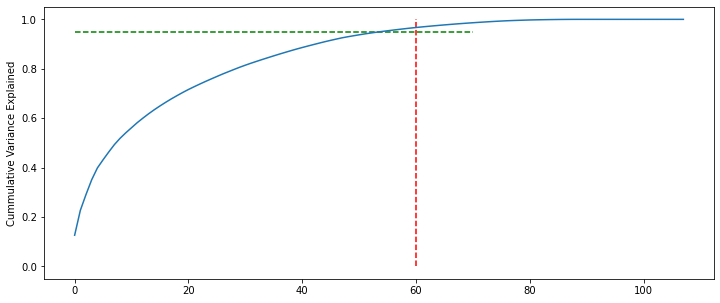

In [259]:
#scree plot for finding the optimal number of principal components
plt.figure(figsize=(12,5))
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=70, xmin=0, colors="g", linestyles="--")
var_cummu=np.cumsum(pca.explained_variance_ratio_)
plt.ylabel("Cummulative Variance Explained")
plt.plot(var_cummu)
plt.show()

#### we see that after plotting the Scree plot we get little more than 95% information from 60 Principal Components.So we take 60 Pricipal Components to proceed further.

In [260]:
#building PCA model again with 60 principal components
pca_final=IncrementalPCA(n_components=60)

In [261]:
#fitting the PCA model on train data
df_train_pca=pca_final.fit_transform(X_train_res)

In [262]:
#creating a dataframe for train data
df_train_pca = pd.DataFrame(df_train_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                                  'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                                                  'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                                                  'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                                                  'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50',
                                                  'PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60'])

In [263]:
df_train_pca.shape

(38430, 60)

In [264]:
df_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,-2.906330,2.231352,-2.302719,-0.327163,5.458121,0.902417,1.019903,-1.212961,1.003568,1.795495,-0.270891,-2.256220,-0.801514,-0.073865,-1.484634,-0.082807,3.446064,1.372151,-1.473208,-3.105351,-0.361877,1.265847,-0.134117,-0.563828,-0.902086,-0.290638,1.372455,0.243450,-0.661295,-0.334162,-2.318603,0.020138,-0.576199,0.121409,-0.001438,-0.383541,-0.097509,-1.302066,-0.081714,-0.674996,0.958539,0.115871,-0.439298,0.045595,-0.948243,1.280858,-0.262615,-0.258662,-0.002829,-0.062155,0.211769,-0.753422,0.252226,-0.243223,0.457829,-0.759956,0.619099,-0.167001,-0.866815,1.040327
1,-2.241414,-1.592639,-0.429548,0.539870,-0.750816,1.021222,1.246660,0.052389,0.961574,0.308054,0.611314,0.870146,0.555391,0.501504,0.435131,0.141404,-0.234478,0.602229,-0.742174,0.465301,0.327944,0.289467,-0.437613,0.181158,-0.162460,0.279517,-0.245493,0.033840,0.456246,-0.357286,0.508696,-0.292549,0.417251,-0.225143,0.718503,0.026016,-0.534650,0.131785,-0.377696,-0.969491,-0.308744,0.112645,0.189121,0.142859,0.080766,-0.920769,-0.448818,0.165385,0.139540,0.044351,0.082046,-0.108974,-0.242455,-0.210467,0.273590,0.473524,-0.124488,0.074359,0.085771,-0.075882
2,2.749046,-2.834276,5.232120,-0.488072,2.322021,-0.117786,-0.411287,-0.851920,-0.886594,-0.708444,-0.760983,0.802103,0.323749,0.211902,-0.079212,-1.729104,-0.220032,0.066584,-0.343621,-0.161888,-0.216834,0.351668,-0.258666,0.177993,0.244874,-0.174197,-0.140165,0.138810,0.113853,-0.001727,-0.009112,0.224645,-0.044475,0.036950,-0.332395,0.368759,-0.144659,0.122308,-0.182721,-0.123781,0.001633,-0.362441,-0.351179,0.170658,-0.123117,-0.165649,0.045154,0.129611,0.056924,-0.026404,0.066870,-0.030222,0.548652,0.212048,0.095873,0.349256,0.568735,-0.040594,-0.165520,0.035606
3,-4.617647,3.811358,1.073165,-1.340964,-1.536567,-4.064890,1.275139,1.148336,-0.535544,-0.296053,-1.014302,0.052440,-0.171213,-2.139831,-0.031776,-0.538717,0.369125,-0.383932,-0.128966,0.167084,-0.186093,0.138662,0.153307,-0.235678,-0.669411,0.175129,-0.224595,0.429803,-0.205978,-0.172103,-0.123782,-0.282240,-0.338571,0.358426,0.587406,-0.456833,-0.071407,-0.214937,-0.697849,-0.522459,-0.645919,-0.076590,0.262658,1.062495,0.211559,-0.056815,-0.393704,-0.195924,0.037985,-0.087240,-0.325438,0.448493,-0.007619,0.267364,-0.633772,0.130597,-0.193754,0.109450,0.125569,0.058237
4,3.791517,-0.965382,2.201352,0.234230,0.677518,-0.898240,0.612944,-3.214676,0.321250,-2.967097,1.969488,-0.976781,-1.006147,-0.077171,1.363417,3.246070,1.940157,-0.618650,0.509990,-0.222191,0.997319,-0.787356,0.393714,0.437196,-0.471170,-0.167002,0.040348,-0.020998,0.235029,-0.767376,0.156919,-0.500822,1.477419,1.509275,-0.310240,-1.192143,-0.836031,0.119822,1.024949,-0.496860,-0.156346,0.206765,0.992914,-0.340511,-0.261049,-0.149769,-0.050551,0.054336,-1.320266,0.297139,0.985009,-0.714324,-0.185452,0.095895,-0.133973,0.489875,0.005273,-2.189076,0.211300,0.552899


In [265]:
#we take the correlation matrix
corrmat=np.corrcoef(df_train_pca.transpose())

<AxesSubplot:>

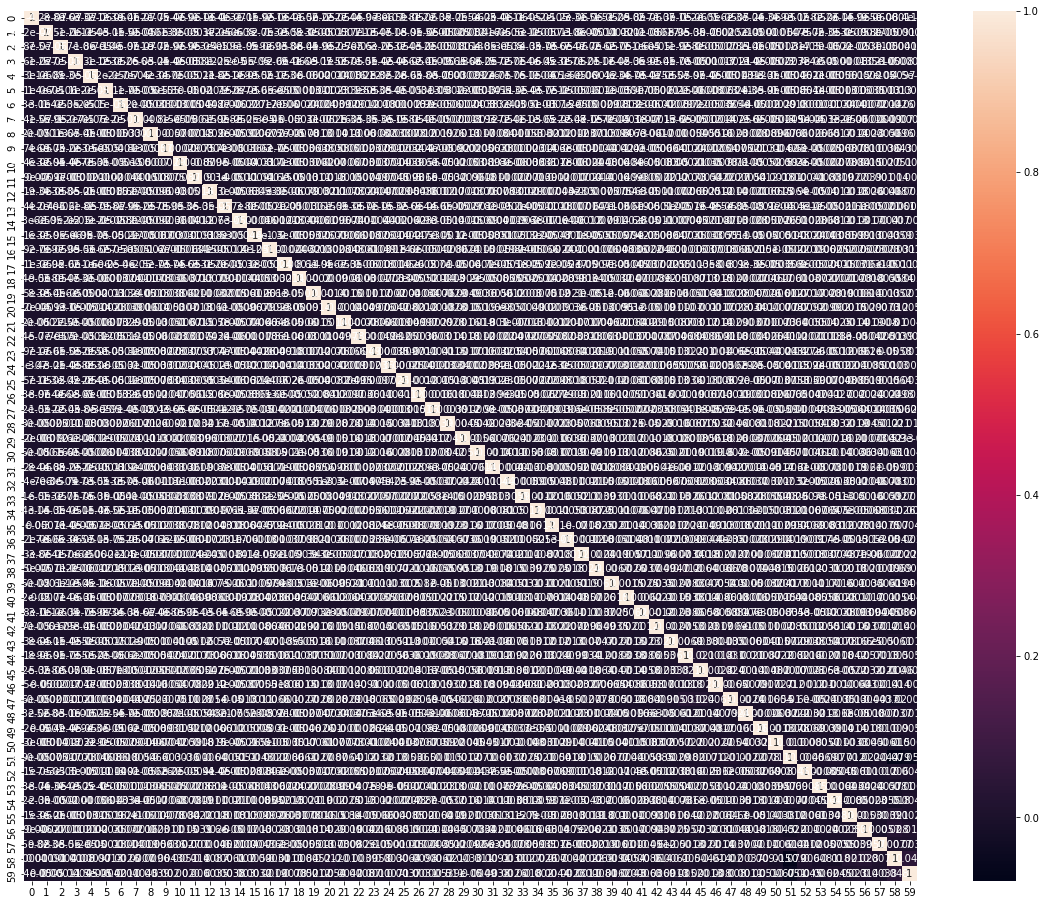

In [266]:
#plotting the correlation matrix in heatmap
plt.figure(figsize=(20,16))
sns.heatmap(corrmat,annot=True)
#Observation:
#we see little to no correlation , so the pricipal components are uncorrrelated with each other.

In [267]:
#applying the transformation on test set
df_test_pca=pca_final.transform(X_test)

In [268]:
df_test_pca.shape

(8986, 60)

In [269]:
#creating a adataframe for test data
df_test_pca = pd.DataFrame(df_test_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                                  'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                                                  'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                                                  'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                                                'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50',
                                                'PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60'])

In [270]:
df_test_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,-3.848342,15.298674,-8.881815,-3.405767,12.156483,2.629670,-0.638751,-0.521441,-10.017558,2.964010,1.269587,4.191139,-3.087596,0.483840,-2.493356,0.425224,0.029364,-2.388892,-3.121261,-2.731043,-2.229083,2.163917,-0.072977,0.091105,-1.802174,1.487097,1.249531,-0.963365,1.158633,-1.490843,0.592027,-0.358990,1.350879,0.618796,0.238191,-1.153633,-0.193908,-1.167092,1.330994,1.835740,0.536106,-0.214437,0.628198,0.333554,-2.091076,1.142457,1.297977,1.128193,-0.195705,-1.455198,1.705021,8.858285,-0.462095,0.617775,2.322410,-1.923379,-0.326302,-0.393681,-7.093059,-2.661807
1,2.855515,2.168868,-0.085827,3.389140,-0.432472,-0.366677,-0.479311,-0.787059,0.660192,-0.717969,0.366198,0.080945,1.056980,-1.430798,-0.957624,0.581585,0.952165,-0.663645,0.668775,0.286166,-0.312485,-1.121978,0.813760,-0.912983,0.024478,0.089008,-0.493315,0.426704,-1.263166,0.182495,0.263161,0.410033,-0.265987,-0.034874,0.704917,0.696407,0.523397,0.945944,1.479961,1.429259,0.706120,0.096164,0.746169,-1.309740,0.561513,0.193289,-0.597454,-0.245884,-0.839690,-0.057106,0.085417,0.385154,0.103336,0.225794,-0.142511,0.245475,0.529907,0.951016,-0.003874,0.255402
2,4.284378,-0.819330,6.244047,-0.922770,2.463970,0.500257,-0.149073,0.829755,-1.004576,-0.177326,-1.091462,1.038713,0.155165,-0.068778,-0.198611,-2.312355,-0.107947,0.271442,-0.777519,0.142512,0.064532,0.092785,-0.107632,-0.721986,0.109876,0.331026,-0.064903,-1.373759,-0.011375,0.164571,-0.126012,-1.103544,0.336400,0.300420,-0.489518,-0.209572,-0.091856,-0.185472,-0.351870,0.350984,0.068060,-0.199774,-0.652682,0.242606,0.150280,-0.420734,0.175646,0.140568,-0.498245,0.304999,0.523865,0.177302,0.101001,0.410921,-0.061649,0.292953,0.478791,-0.095252,-0.125502,-0.370830
3,-2.577944,2.571697,1.992853,1.256385,0.064469,5.337608,8.406104,-2.848583,1.572832,2.064218,0.016266,0.163259,-0.914113,2.214364,-1.900674,0.326724,-1.849040,-0.955216,0.009659,-0.003778,0.463816,2.026070,0.125293,2.151042,-5.694274,-1.631489,-1.738953,-1.241574,-0.034524,0.641729,0.219074,0.604455,-0.684461,-0.205570,-0.286126,-0.542907,0.477725,1.167254,0.218976,-0.352904,0.155592,-1.434153,-0.008040,-0.265938,-0.741237,-0.337062,-0.093565,0.712279,0.042280,0.196234,0.052879,-0.283452,0.106262,-0.730895,-0.165952,0.461671,0.035277,-0.067047,0.182978,0.019010
4,-2.842086,3.513232,1.038912,3.961787,-0.961583,-0.675798,-1.290529,2.992783,0.492829,-0.721684,-0.678032,0.934786,-0.825636,1.935963,-0.088074,0.463528,-1.263741,1.055671,-0.521060,0.488871,-0.010237,0.773752,0.619624,0.726584,0.272403,-0.526863,0.538589,0.043754,0.456144,0.101658,0.171570,0.180138,0.379216,0.012679,0.914752,-0.038572,-0.220472,-0.207388,-0.348634,-1.058062,0.659165,0.742754,-0.065468,0.694382,-0.855432,0.693851,-0.323892,0.026614,0.101139,-0.073617,-0.105889,0.171427,0.189392,0.035252,0.010309,-0.130035,-0.238071,0.092442,-0.775837,0.558721


### Applying Logistic Regression with PCA

In [271]:
#importing the library for logistic regression
from sklearn.linear_model import LogisticRegression

In [272]:
#instantiating an object of LinearRegression
learner_pca = LogisticRegression()

In [273]:
#fitting the model on train data
model_pca = learner_pca.fit(df_train_pca, y_train_res)

In [274]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [275]:
from sklearn import metrics

In [276]:
#Train AUC score
train_auc_pca="{:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train[:,1]))
train_auc_pca

'0.95'

In [277]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [278]:
#test AUC score
test_auc_pca="{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))
test_auc_pca

'0.94'

In [279]:
#importing the libraries for different metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [280]:
#making predictions on test data
predictions=model_pca.predict(df_test_pca)

In [281]:
#test_accuracy
pca_log_test_acu=accuracy_score(y_test,predictions)

In [282]:
#making predictions on train data
predictions_train=model_pca.predict(df_train_pca)

In [283]:
#train accuracy
pca_log_train_acu=accuracy_score(y_train_res,predictions_train)

In [284]:
#confusion_matrix for train data
confusion=metrics.confusion_matrix(y_train_res,predictions_train)
print('Confusion Matix for train data :')
confusion

Confusion Matix for train data :


array([[16426,  2789],
       [ 1664, 17551]], dtype=int64)

In [285]:
TN=confusion[0,0]
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]

In [286]:
#sensitivity of train data
sensitivity_pca_train=TP/(TP+FN)

In [287]:
#specificity of train data
specificity_pca_train=TN/(TN+FP)

In [288]:
#confusion matrix for test data
confusion=metrics.confusion_matrix(y_test,predictions)
print('Confusion Matix for test data :')
confusion

Confusion Matix for test data :


array([[7031, 1274],
       [  71,  610]], dtype=int64)

In [289]:
TN=confusion[0,0]
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]

In [290]:
#sensitivity of test data
sensitivity_pca_test=TP/(TP+FN)

In [291]:
#specificity of test data
specificity_pca_test=TN/(TN+FP)

##### Model Evaluation using Logistic Regression with PCA

In [292]:

print("Using PCA with Logistic Regression : ")

print('Train AUC : ',train_auc_pca)
print('Test AUC : ',test_auc_pca)

print('Train Accuracy : ',pca_log_train_acu)
print('Test Accuracy : ',pca_log_test_acu)

print('Train Sensitivity : ',sensitivity_pca_train)
print('Test Sensitivity : ',sensitivity_pca_test)

print('Train Specificity : ',specificity_pca_train)
print('Test Specificity : ',specificity_pca_test)


Using PCA with Logistic Regression : 
Train AUC :  0.95
Test AUC :  0.94
Train Accuracy :  0.8841269841269841
Test Accuracy :  0.850322724237703
Train Sensitivity :  0.9134009888108249
Test Sensitivity :  0.895741556534508
Train Specificity :  0.8548529794431434
Test Specificity :  0.8465984346779049


##### The above model made using Logistic Regression with PCA performs really well.
##### Also churn is represented using label: 1, so the most important metric for us is sensitivity i.e. to predict the churn correctly.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention is very important.

### Decision Tree with PCA

In [293]:
#importing the library for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [294]:
dt = DecisionTreeClassifier(random_state=42)

In [295]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [296]:
# Instantiate the grid search model
grid_search_dt = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [297]:
%%time
grid_search_dt.fit(df_train_pca, y_train_res)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 2min 48s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [298]:
#finding the best estimator
dt_best = grid_search_dt.best_estimator_

In [299]:
#looking at the best parameters
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

In [300]:
#train and test accuracy
dt_acc_train=accuracy_score(y_train_res, dt_best.predict(df_train_pca))
dt_acc_test=accuracy_score(y_test, dt_best.predict(df_test_pca))

In [301]:
#confusion matrix for train data
confusion=metrics.confusion_matrix(y_train_res, dt_best.predict(df_train_pca))
print('Confusion Matix for train data :')
confusion

Confusion Matix for train data :


array([[18794,   421],
       [  499, 18716]], dtype=int64)

In [302]:
TN=confusion[0,0]
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]

In [303]:
#sensitivity of train data
sensitivity_pca_train_dt=TP/(TP+FN)
sensitivity_pca_train_dt

0.9740307051782462

In [304]:
#specificity of train data
specificity_pca_train_dt=TN/(TN+FP)
specificity_pca_train_dt

0.9780900338277387

In [305]:
#confusion matrix for test data
confusion=metrics.confusion_matrix(y_test, dt_best.predict(df_test_pca))
print('Confusion Matix for test data :')
confusion

Confusion Matix for test data :


array([[7407,  898],
       [ 259,  422]], dtype=int64)

In [306]:
TN=confusion[0,0]
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]

In [307]:
#sensitivity of test data
sensitivity_pca_test_dt=TP/(TP+FN)
sensitivity_pca_test_dt

0.6196769456681351

In [308]:
#specificity of test data
specificity_pca_test_dt=TN/(TN+FP)
specificity_pca_test_dt

0.8918723660445514

#### Model Evaluation for DecisionTreeClassifier with PCA

In [309]:

print("Using PCA with DecisionTreeClassifier : ")

print('Train Accuracy : ',dt_acc_train)
print('Test Accuracy : ',dt_acc_test)

print('Train Sensitivity : ',sensitivity_pca_train_dt)
print('Test Sensitivity : ',sensitivity_pca_test_dt)

print('Train Specificity : ',specificity_pca_train_dt)
print('Test Specificity : ',specificity_pca_test_dt)

Using PCA with DecisionTreeClassifier : 
Train Accuracy :  0.9760603695029925
Test Accuracy :  0.8712441575784554
Train Sensitivity :  0.9740307051782462
Test Sensitivity :  0.6196769456681351
Train Specificity :  0.9780900338277387
Test Specificity :  0.8918723660445514


### Random Forest with PCA

In [310]:
#importing the important libraries for  Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [311]:
forest_pca = RandomForestClassifier(random_state=42, n_jobs=-1)

In [312]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [313]:
# Instantiate the grid search model
grid_search_1 = GridSearchCV(estimator=forest_pca, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [314]:
%%time
grid_search_1.fit(df_train_pca, y_train_res)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
Wall time: 42min 54s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [315]:
#finding the best parameters
rf_best_1 = grid_search_1.best_estimator_

In [316]:
rf_best_1

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [317]:
forest_acc_train=accuracy_score(y_train_res, rf_best_1.predict(df_train_pca))
forest_acc_test=accuracy_score(y_test, rf_best_1.predict(df_test_pca))

In [318]:
#confusion matrix for train data
confusion=metrics.confusion_matrix(y_train_res, rf_best_1.predict(df_train_pca))
print('Confusion Matix for train data :')
confusion

Confusion Matix for train data :


array([[18644,   571],
       [   77, 19138]], dtype=int64)

In [319]:
TN=confusion[0,0]
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]

In [320]:
#sensitivity of train data
sensitivity_pca_train_forest=TP/(TP+FN)
sensitivity_pca_train_forest

0.9959927140255009

In [321]:
#specificity of train data
specificity_pca_train_forest=TN/(TN+FP)
specificity_pca_train_forest

0.9702836325787145

In [322]:
#confusion matrix for test data
confusion=metrics.confusion_matrix(y_test, rf_best_1.predict(df_test_pca))
print('Confusion Matix for test data :')
confusion

Confusion Matix for test data :


array([[7803,  502],
       [ 223,  458]], dtype=int64)

In [323]:
TN=confusion[0,0]
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]

In [324]:
#sensitivity of test data
sensitivity_pca_test_forest=TP/(TP+FN)
sensitivity_pca_test_forest

0.6725403817914831

In [325]:
#specificity of test data
specificity_pca_test_forest=TN/(TN+FP)
specificity_pca_test_forest

0.9395544852498495

#### Model Evaluation using Random Forest with PCA

In [326]:

print("Using PCA with Random Forest : ")

print('Train Accuracy : ',forest_acc_train)
print('Test Accuracy : ',forest_acc_test)

print('Train Sensitivity : ',sensitivity_pca_train_forest)
print('Test Sensitivity : ',sensitivity_pca_test_forest)

print('Train Specificity : ',specificity_pca_train_forest)
print('Test Specificity : ',specificity_pca_test_forest)

Using PCA with Random Forest : 
Train Accuracy :  0.9831381733021077
Test Accuracy :  0.9193189405742266
Train Sensitivity :  0.9959927140255009
Test Sensitivity :  0.6725403817914831
Train Specificity :  0.9702836325787145
Test Specificity :  0.9395544852498495


##### The above model made using Random Forest with PCA does not performs well because Sensitivity for test data is very low compared to train.
##### Also churn is represented using label: 1, so the most important metric for us is sensitivity i.e. to predict the churn correctly.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention is very important.

### Random Forest

In [327]:
X_train_res.shape

(38430, 108)

In [328]:
y_train_res.shape

(38430,)

In [329]:
#importing the important libraries for  Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [330]:
#instantiating an object of RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [331]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [332]:
# Instantiate the grid search model for hyperparameter tuning
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [333]:

%%time
grid_search.fit(X_train_res,y_train_res)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
Wall time: 23min 12s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [334]:
#finding the best estimator model
rf_best = grid_search.best_estimator_

In [335]:
#best model with its hyperparameters
rf_best

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [336]:
# Model Evaluation on train data
y_pred = rf_best.predict(X_train_res)

# create onfusion matrix
confusion = confusion_matrix(y_train_res, y_pred)
print(confusion)

TN=confusion[0,0]
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]
# check sensitivity and specificity
#sensitivity
sensitivity_train=TP/(TP+FN)
#specificity
specificity_train=TN/(TN+FP)
# check area under curve
y_pred_prob = rf_best.predict_proba(X_train_res)[:, 1]
train_acu_rf=accuracy_score(y_train_res, y_pred)
print("Train Accuracy : ",accuracy_score(y_train_res, y_pred))
print("Sensitivity of train data : ",sensitivity_train)
print("Specificity of train data : ",specificity_train)

[[18778   437]
 [  110 19105]]
Train Accuracy :  0.9857663283892792
Sensitivity of train data :  0.9942753057507155
Specificity of train data :  0.9772573510278428


In [337]:
# Model Evaluation on test data
y_pred = rf_best.predict(X_test)

# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

TN=confusion[0,0]
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]
# check sensitivity and specificity
#sensitivity
sensitivity_test=TP/(TP+FN)
#specificity
specificity_test=TN/(TN+FP)
# check area under curve
y_pred_prob = rf_best.predict_proba(X_test)[:, 1]
#print("AUC Test:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
test_acu_rf=accuracy_score(y_test, y_pred)
print("Test Accuracy : ",accuracy_score(y_test, y_pred))
print("Sensitivity of test data : ",sensitivity_test)
print("Specificity of test data : ",specificity_test)


[[7964  341]
 [ 183  498]]
Test Accuracy :  0.9416870687736479
Sensitivity of test data :  0.7312775330396476
Specificity of test data :  0.9589403973509933


In [338]:
#building the Random Forest model again with best parameters
classifier_rf = RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                                       n_estimators=200, n_jobs=-1, random_state=42)

In [339]:
#fitting the best model
classifier_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [340]:
#feature importance using RandomForest
classifier_rf.feature_importances_

array([3.75589781e-02, 1.36872300e-02, 1.06495984e-02, 3.40536372e-02,
       3.19463488e-02, 1.40247866e-02, 2.31740327e-02, 9.52560201e-03,
       1.56228113e-03, 3.25756561e-02, 5.16597147e-03, 5.66402139e-03,
       1.08791809e-03, 8.56910618e-03, 1.50404156e-03, 4.91259876e-03,
       4.42168033e-05, 2.16896679e-02, 3.13850229e-02, 2.95882494e-02,
       1.41855338e-02, 4.25638947e-02, 3.43478791e-03, 7.86695880e-03,
       2.88000760e-03, 1.13765491e-02, 3.61341113e-02, 3.61226690e-03,
       1.70460033e-03, 2.43152420e-03, 1.76993081e-02, 3.17495692e-02,
       2.27286450e-02, 5.80920223e-03, 6.34201812e-03, 3.82669708e-02,
       5.03800361e-03, 5.94573508e-03, 2.50114366e-02, 2.83275924e-03,
       4.37677521e-03, 1.47374260e-02, 1.87722487e-02, 1.99583611e-02,
       4.00733920e-02, 2.05856454e-02, 1.94615288e-02, 7.85725453e-03,
       7.10592325e-03, 4.44735625e-03, 4.94655296e-03, 4.41505845e-05,
       1.95633535e-03, 5.47743796e-03, 2.01483603e-03, 1.29510055e-03,
      

In [341]:
#converting the variables with there importance value into a dataframe imp_df
imp_df = pd.DataFrame({
    "Varname": X_train_res.columns,
    "Imp": classifier_rf.feature_importances_
})

In [342]:
#sorting df_imp in descending order to see the top important features
imp_df=imp_df.sort_values(by="Imp", ascending=False)

In [343]:
imp_df

,Varname,Imp
21,loc_ic_mou_8,0.042564
44,count_rech_2g_8,0.040073
35,date_of_last_rech_8,0.038267
0,arpu_8,0.037559
26,total_ic_mou_8,0.036134
3,roam_ic_mou_8,0.034054
9,loc_og_mou_8,0.032576
4,roam_og_mou_8,0.031946
31,total_rech_amt_8,0.031750
18,loc_ic_t2t_mou_8,0.031385


In [344]:
imp_df.shape

(108, 2)

<AxesSubplot:xlabel='Imp', ylabel='Varname'>

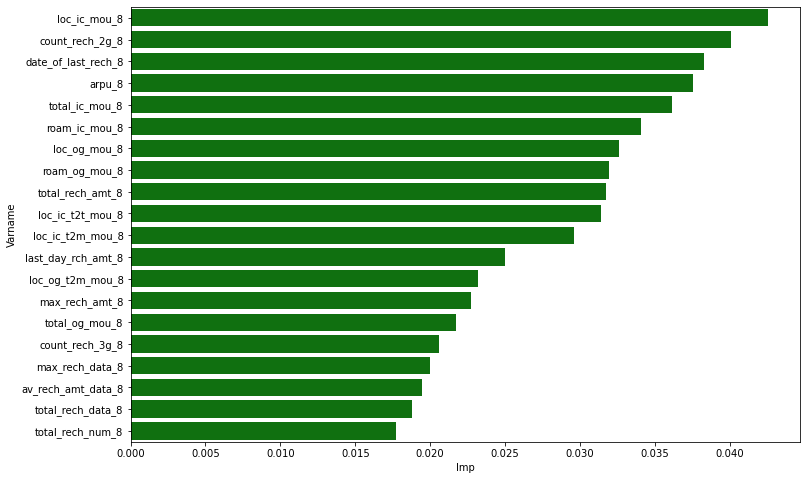

In [345]:
#Top 20 features
plt.figure(figsize=(12,8))
sns.barplot(x='Imp',y='Varname',data=imp_df[:20],color='g')

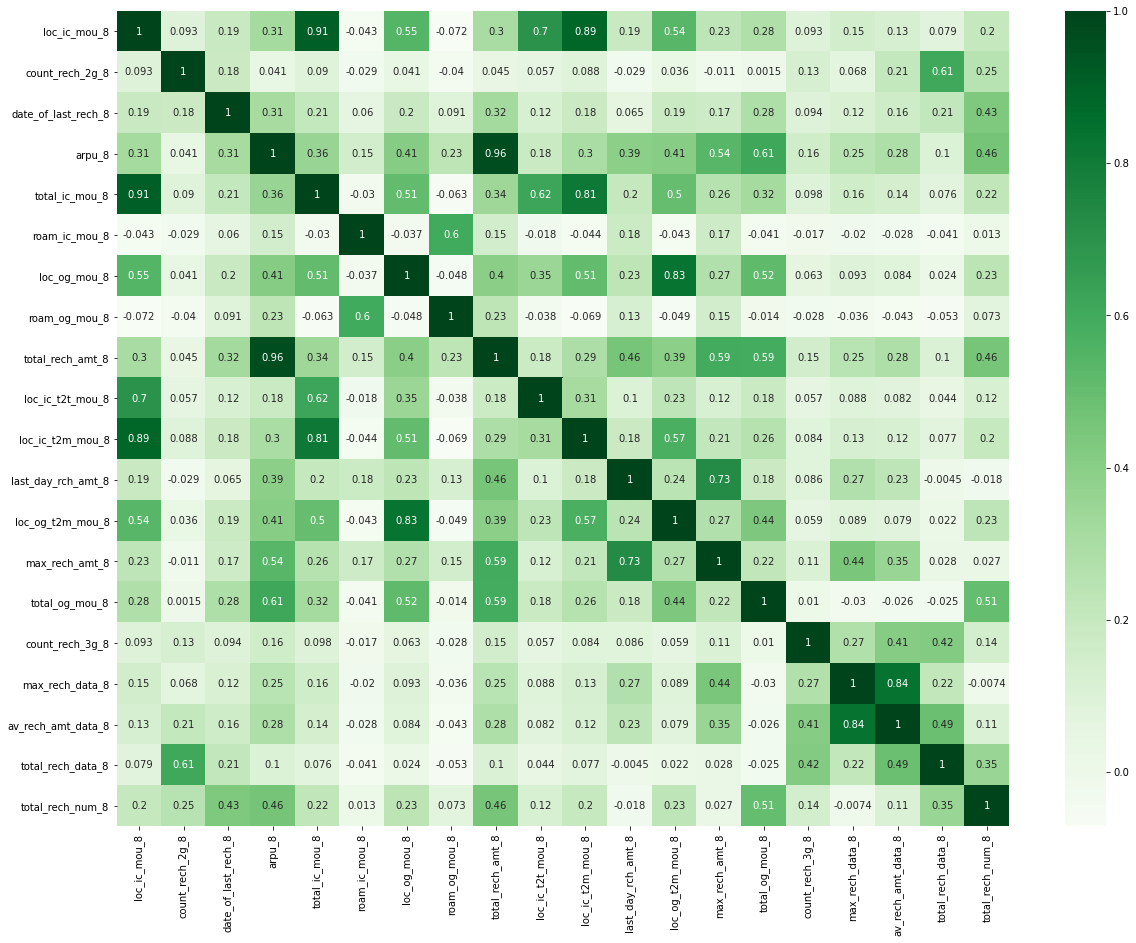

In [346]:
#looking at the correlation among top 20 features
plt.figure(figsize=(20,15))
sns.heatmap(X_train_res[imp_df['Varname'][:20]].corr(),annot=True,cmap='Greens')
plt.show()

In [347]:
#lets pick the important feature with the help of above plot and correlation matrix
important_features = ['count_rech_2g_8','arpu_8','roam_ic_mou_8','roam_og_mou_8','max_rech_amt_8',
                     'count_rech_3g_8','av_rech_amt_data_8','total_rech_num_8','total_rech_data_8','total_rech_amt_8']

### Logistic Regression - Building Model again on top of Random Forest with the important features to see the how the important features impact Churn

In [348]:
#Lets build the LogisticRegresstion with only important features
X_train_scale_1 = X_train_res[important_features]
X_test_scale_1 = X_test[important_features]

In [349]:
#fitting the logisticRegression model
logi = LogisticRegression()
                          
folds = 5

params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],'penalty':['l1','l2']}

model = GridSearchCV(estimator=logi,
                     cv=folds,
                     param_grid=params,
                     scoring='roc_auc',
                     n_jobs=-1,
                     verbose=1)

model.fit(X_train_scale_1,y_train_res)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [350]:
#finding the best paramets
model.best_params_

{'C': 10, 'penalty': 'l2'}

In [351]:
#fitting the model with best parameters
logi = LogisticRegression(C=10, penalty='l2')
logi.fit(X_train_scale_1,y_train_res)

LogisticRegression(C=10)

In [352]:
#train accuracy and AUC score
y_train_pred = logi.predict(X_train_scale_1)
y_train_pred_proba = logi.predict_proba(X_train_scale_1)
log_train_auc=round(accuracy_score(y_train_res,y_train_pred),2)
print('accuracy of the model on train data: \t',log_train_auc)
print('area under the cure: \t',round(model.best_score_,2))

accuracy of the model on train data: 	 0.83
area under the cure: 	 0.92


In [353]:
from imblearn.metrics import sensitivity_specificity_support
sensitivity_log_train,specificity_log_train, _ = sensitivity_specificity_support(y_train_res,y_train_pred,average='binary')
print('sensitivity for train data: \t',round(sensitivity_log_train,2), "\n",
      'specificity for train data: \t', round(specificity_log_train,2), sep='')

sensitivity for train data: 	0.89
specificity for train data: 	0.77


In [354]:
# Model evaluation on test data
y_test_pred = logi.predict(X_test_scale_1)
y_test_pred_proba = logi.predict_proba(X_test_scale_1)

In [355]:
from sklearn.metrics import roc_auc_score

In [356]:
log_test_auc=round(accuracy_score(y_test,y_test_pred),2)
print('accuracy of the model on test data: \t',log_test_auc)
print('area under the cure on test data: \t',round(roc_auc_score(y_test,y_test_pred_proba[:,1]),2))

accuracy of the model on test data: 	 0.77
area under the cure on test data: 	 0.9


In [357]:
#confusion matrix
confusion_matrix(y_test,y_test_pred)

array([[6354, 1951],
       [  95,  586]], dtype=int64)

In [358]:
from imblearn.metrics import sensitivity_specificity_support

In [359]:
sensitivity_log_test,specificity_log_test, _ = sensitivity_specificity_support(y_test,y_test_pred,average='binary')
print('sensitivity on test data: \t',round(sensitivity_log_test,2),
      "\n", 'specificity on test data: \t', round(specificity_log_test,2), sep='')

sensitivity on test data: 	0.86
specificity on test data: 	0.77


In [360]:
#finding the intercept of logistic model
logi.intercept_

array([-5.56099583])

In [361]:
#creating a dataframe of most important variables with their coefficients
inter_df = pd.DataFrame({'features':important_features,'coefficients':logi.coef_.flatten()})
inter_df

,features,coefficients
0,count_rech_2g_8,-5.922583
1,arpu_8,-1.217076
2,roam_ic_mou_8,0.093165
3,roam_og_mou_8,0.545198
4,max_rech_amt_8,-0.055610
5,count_rech_3g_8,-8.219269
6,av_rech_amt_data_8,0.358960
7,total_rech_num_8,-0.300371
8,total_rech_data_8,-0.180186
9,total_rech_amt_8,-0.582900


### Conclusion :


<AxesSubplot:xlabel='coefficients', ylabel='features'>

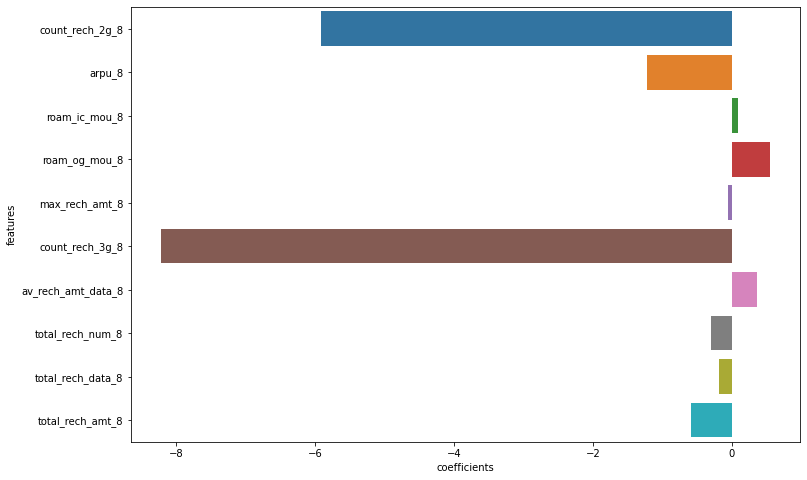

In [362]:
#Top features and their effect on churn rate
plt.figure(figsize=(12,8))
sns.barplot(x='coefficients',y='features',data=inter_df)

#### Variables negativly related to Churn:
count_rech_2g_8, 
arpu_8, 
max_rech_amt_8, 
count_rech_3g_8, 
total_rech_num_8, 
total_rech_data_8, 
total_rech_amt_8 
#### Variables positivly related with Churn:
roam_ic_mou_8, roam_og_mou_8, av_rech_amt_data_8

##### Model Evaluation for Logistic Regression using PCA

In [363]:
print("Using PCA with Logistic Regression : ")
print("\n")
print('Train AUC : ',train_auc_pca)
print('Test AUC : ',test_auc_pca)
print("\n")
print('Train Accuracy : ',pca_log_train_acu)
print('Test Accuracy : ',pca_log_test_acu)
print("\n")
print('Train Sensitivity : ',sensitivity_pca_train)
print('Test Sensitivity : ',sensitivity_pca_test)
print("\n")
print('Train Specificity : ',specificity_pca_train)
print('Test Specificity : ',specificity_pca_test)

Using PCA with Logistic Regression : 


Train AUC :  0.95
Test AUC :  0.94


Train Accuracy :  0.8841269841269841
Test Accuracy :  0.850322724237703


Train Sensitivity :  0.9134009888108249
Test Sensitivity :  0.895741556534508


Train Specificity :  0.8548529794431434
Test Specificity :  0.8465984346779049


##### The above model made using Logistic Regression with PCA performs really well.
##### Also churn is represented using label: 1, so the most important metric for us is sensitivity i.e. to predict the churn correctly.
##### Our Sensitivity scores are very good i.e. the model is able to predict Churn properly.

Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention is very important.

##### Model Evaluation for DecisionTreeClassifier using PCA

In [364]:
print("Using PCA with DecisionTreeClassifier : ")
print("\n")
print('Train Accuracy : ',dt_acc_train)
print('Test Accuracy : ',dt_acc_test)
print("\n")
print('Train Sensitivity : ',sensitivity_pca_train_dt)
print('Test Sensitivity : ',sensitivity_pca_test_dt)
print("\n")
print('Train Specificity : ',specificity_pca_train_dt)
print('Test Specificity : ',specificity_pca_test_dt)

Using PCA with DecisionTreeClassifier : 


Train Accuracy :  0.9760603695029925
Test Accuracy :  0.8712441575784554


Train Sensitivity :  0.9740307051782462
Test Sensitivity :  0.6196769456681351


Train Specificity :  0.9780900338277387
Test Specificity :  0.8918723660445514


##### The above model made using DecisionTreeClassifier with PCA does not performs well because Sensitivity for test data is very low compared to train.
##### Also churn is represented using label: 1, so the most important metric for us is sensitivity i.e. to predict the churn correctly.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention is very important.

##### Model Evaluation for Random Forest using PCA

In [365]:
print("Using PCA with Random Forest : ")
print("\n")
print('Train Accuracy : ',forest_acc_train)
print('Test Accuracy : ',forest_acc_test)
print("\n")
print('Train Sensitivity : ',sensitivity_pca_train_forest)
print('Test Sensitivity : ',sensitivity_pca_test_forest)
print("\n")
print('Train Specificity : ',specificity_pca_train_forest)
print('Test Specificity : ',specificity_pca_test_forest)

Using PCA with Random Forest : 


Train Accuracy :  0.9831381733021077
Test Accuracy :  0.9193189405742266


Train Sensitivity :  0.9959927140255009
Test Sensitivity :  0.6725403817914831


Train Specificity :  0.9702836325787145
Test Specificity :  0.9395544852498495


##### The above model made using Random Forest with PCA does not performs well because Sensitivity for test data is very low compared to train.
##### Also churn is represented using label: 1, so the most important metric for us is sensitivity i.e. to predict the churn correctly.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention is very important.

In [366]:
print('Without PCA')
print("Using Random Forest for finding the important features: ")
print("\n")
print("Train Accuracy : ",train_acu_rf)
print("Test Accuracy : ",test_acu_rf)
print("\n")
print("Sensitivity of train data : ",sensitivity_train)
print("Sensitivity of test data : ",sensitivity_test)
print("\n")
print("Specificity of train data : ",specificity_train)
print("Specificity of test data : ",specificity_test)

Without PCA
Using Random Forest for finding the important features: 


Train Accuracy :  0.9857663283892792
Test Accuracy :  0.9416870687736479


Sensitivity of train data :  0.9942753057507155
Sensitivity of test data :  0.7312775330396476


Specificity of train data :  0.9772573510278428
Specificity of test data :  0.9589403973509933


In [367]:
print('Without PCA')
print("Using Logistic Regression after taking the important features given by Random Forest: ")
print("\n")
print('Train Accuracy : ',log_train_auc)
print('Test Accuracy : ',log_test_auc)
print("\n")
print('Train Sensitivity : ',sensitivity_log_train)
print('Test Sensitivity : ',sensitivity_log_test)
print("\n")
print('Train Specificity : ',specificity_log_train)
print('Test Specificity : ',specificity_log_test)

Without PCA
Using Logistic Regression after taking the important features given by Random Forest: 


Train Accuracy :  0.83
Test Accuracy :  0.77


Train Sensitivity :  0.8938849856882644
Test Sensitivity :  0.8604992657856094


Train Specificity :  0.7729378090033828
Test Specificity :  0.7650812763395545


### Strategies to Manage Churn :


1. Customers with tenure less than 3-4 years are most likly to churn.

2. Local incoming calls in action phase,count of 2g and 3g recharge in action phase, Average revenue per user in action phase, total incoming calls in action phase, roaming incoming and outging calls in action phase, total outgoing calls in action phase, total recharge amount in action phase are strong indicators of Churn

3. company should take a look into there Roaming charges on both incomming and outgoing calls,since it is one of the important predictors and should give some offers to roaming calls

4. Price of the data packs 2g,3g should be reduced or special offers should be given.

5. we find that for churned customers there is a significant decrease in average number of calls within same network from good phase to action phase.Also the avearge number of customers in good phase is more for those who have churned.

6. we find that for churned customers there is a significant decrease in average number of calls outside operator network T good phase to action phase.

7. we find that for churned customers there is a significant decrease in average number of local outgoing calls from good phase to action phase.

8. we find that for churned customers there is a significant decrease in average number of STD outgoing calls from good phase to action phase.

9. we find that for churned customers there is a significant decrease in average number of ISD outgoing calls from good phase to action phase.

10. we find that for churned customers there is a significant decrease in average number of total outgoing calls from good phase to action phase.

11. we find that for churned customers there is a significant decrease in average number of local incoming calls from good phase to action phase.

12. we find that for churned customers there is a significant decrease in average number of STD incoming calls from good phase to action phase.

13. we find that for churned customers there is a significant decrease in average number of ISD incoming calls from good phase to action phase.

14. we find that for churned customers there is a significant decrease in average number of total incoming calls from good phase to action phase.

15. we find that for churned customers there is a significant decrease in average of total recharge amount from good phase to action phase.
 
16. we find that for churned customers there is a significant decrease in average revenue per user for 3g data from good phase to action phase.

17. we find that for churned customers there is a significant decrease in average revenue per user for 2g data from good phase to action phase.

18. Generally for all the customers who have churned there is a huge drop in services in action phase from good phase, so if there is a drop from good phase to action phase the Company should try to retain these customers by improving their services and giving discounts.


To look into the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. 